# <center>Vizuelizacija podataka u programskom jeziku Julia</center>

## <center>DataFrames biblioteka</center>

   Paket **DataFrames** u programskom jeziku **Julia**, pruža mogućnost učitavanja podataka predstavljenih u formatu vrednosti razdvojenih zarezom (eng. **comma separated values**) u **DataFrame** objekat. Takođe, moguće je kreirati **DataFrame** objekat navođenjem željenih kolona i pridruženih vrednosti odgovarajućoj koloni. Nakon učitavanja podataka u instancu tipa **DataFrame** ili kreiranja **DataFrame**-a, moguće je koristiti različite implementirane funkcije za manipulaciju nad podacima.

In [1]:
using DataFrames
using Statistics
using CSV

### <center>Kreiranje novog DataFrame-a</center>

- Da bi se kreirao novi **DataFrame**, najpre je potrebno učitati **DataFrames** biblioteku (**using DataFrames** naredba).
- Kolone **DataFrame**-a se tretiraju kao nizovi, tako da je najpre moguće kreirati sve nizove koji predstavljaju individualne kolone.
- Kreiranje **DataFrame**-a postiže se instanciranjem tipa **DataFrame** i prosleđivanjem nizova kreiranih kolona, odnosno atributa kao argumenata.
- Prilikom štampanja kreiranog **DataFrame**-a, **Jupyter notebook** će pored naziva kolona prikazati i tipove vrednosti koje svaka kolona sadrži.
- Svaka vrsta odnosno red u kreiranom **DataFrame**-u predstavlja instancu (opservaciju), dok kolone predstavljaju obeležja (eng. **features**), odnosno atribute.


In [2]:
grad = ["Niš", "Beograd", "Novi Sad"]
broj_stanovnika = [260237, 1166763, 250439]
df = DataFrame(grad=grad, broj_stanovnika=broj_stanovnika)

3×2 DataFrame
 Row │ grad      broj_stanovnika 
     │ String    Int64           
─────┼───────────────────────────
   1 │ Niš                260237
   2 │ Beograd           1166763
   3 │ Novi Sad           250439

### <center>Dodavanje nove instance (opservacije) u DataFrame</center>

- Dodavanje nove opservacije postiže se pozivom **push** metode (**push!** ukoliko želimo da promene izvršimo u originalnom **DataFrame**-u).
- Kao prvi argument prosleđujemo **DataFrame** objekat, a kao drugi element prosleđujemo vektor vrednosti koje želimo da dodamo. 
- Ukoliko ne navodimo argument kome pridružujemo vrednost, vrednosti navodimo istim redosledom koji smo navodili prilikom kreiranja atributa (prvo navodimo ima grada, a nakon toga broj stanovnika).

In [3]:
push!(df, ["Leskovac", 144206])

4×2 DataFrame
 Row │ grad      broj_stanovnika 
     │ String    Int64           
─────┼───────────────────────────
   1 │ Niš                260237
   2 │ Beograd           1166763
   3 │ Novi Sad           250439
   4 │ Leskovac           144206

- Ukoliko želimo da atribute prilkom dodavanja nove opservacije navodimo u proizvoljnom redosledu, kao drugi argument pri pozivu metode **push!** navodimo rečnik (eng. **dictionary**).
- Rečnik je kolekcija parova, gde je prvi član para naziv atributa, a drugi član vrednost koju dodeljujemo atributu.

In [4]:
push!(df, Dict(:broj_stanovnika => 40267, :grad => "Pirot"))

5×2 DataFrame
 Row │ grad      broj_stanovnika 
     │ String    Int64           
─────┼───────────────────────────
   1 │ Niš                260237
   2 │ Beograd           1166763
   3 │ Novi Sad           250439
   4 │ Leskovac           144206
   5 │ Pirot               40267

### <center>Dodavanje nove kolone u DataFrame</center>

In [5]:
df[:, :okrug] = ["nišavski", "beogradski", "južnobački", "jablanički", "pirotski"]
df

5×3 DataFrame
 Row │ grad      broj_stanovnika  okrug      
     │ String    Int64            String     
─────┼───────────────────────────────────────
   1 │ Niš                260237  nišavski
   2 │ Beograd           1166763  beogradski
   3 │ Novi Sad           250439  južnobački
   4 │ Leskovac           144206  jablanički
   5 │ Pirot               40267  pirotski

### <center>Određivanje dimenzija DataFrame-a</center>

- Funkcija **size** sa prosleđenim **DataFrame**-om kao argumentom vraća torku (eng. **tuple**) dva elementa.
- Torka je u ovom slučaju uređena dvojka elmenata, gde prvi element ukazuje na broj opservacija u **DataFrame**-u, a drugi element broj obeležja (kolona).

In [6]:
size(df)

(5, 3)

Funkcija **name** sa prosleđenim **DataFrame**-om kao argumentom vraća niz čiji su elementi nazivi kolona.

In [7]:
for column_name in names(df)
   println(column_name) 
end

grad
broj_stanovnika
okrug


### <center>Promena naziva kolona</center>

- Ukoliko bismo najpre dodali kolonu pod nazivom **trest** umesto **test** i otkrili da smo načinili grešku, istu možemo ispraviti pomoću metode **rename**.
- U primeru ispod, najpre je dodata kolona pod nazivom **trest**, a zatim je ispravljena greška pozivom metode **rename**.

In [8]:
df[:, :trest] = ["test 1", "test 2", "test 3", "test 4", "test 5"]
df

5×4 DataFrame
 Row │ grad      broj_stanovnika  okrug       trest  
     │ String    Int64            String      String 
─────┼───────────────────────────────────────────────
   1 │ Niš                260237  nišavski    test 1
   2 │ Beograd           1166763  beogradski  test 2
   3 │ Novi Sad           250439  južnobački  test 3
   4 │ Leskovac           144206  jablanički  test 4
   5 │ Pirot               40267  pirotski    test 5

In [9]:
# ispravljanje greške nastale prilikom imenovanja kolone

rename!(df, :trest => :test)
df

5×4 DataFrame
 Row │ grad      broj_stanovnika  okrug       test   
     │ String    Int64            String      String 
─────┼───────────────────────────────────────────────
   1 │ Niš                260237  nišavski    test 1
   2 │ Beograd           1166763  beogradski  test 2
   3 │ Novi Sad           250439  južnobački  test 3
   4 │ Leskovac           144206  jablanički  test 4
   5 │ Pirot               40267  pirotski    test 5

### <center>Uklanjanje kolone</center>

In [10]:
select!(df, Not(:test))

5×3 DataFrame
 Row │ grad      broj_stanovnika  okrug      
     │ String    Int64            String     
─────┼───────────────────────────────────────
   1 │ Niš                260237  nišavski
   2 │ Beograd           1166763  beogradski
   3 │ Novi Sad           250439  južnobački
   4 │ Leskovac           144206  jablanički
   5 │ Pirot               40267  pirotski

### <center>Uklanjanje reda</center>

In [11]:
# Najpre dodajemo novi red koji ćemo iskoristiti u svrhu demonstracije brisanja

push!(df, ["Test grad", 300000, "test okrug"])

6×3 DataFrame
 Row │ grad       broj_stanovnika  okrug      
     │ String     Int64            String     
─────┼────────────────────────────────────────
   1 │ Niš                 260237  nišavski
   2 │ Beograd            1166763  beogradski
   3 │ Novi Sad            250439  južnobački
   4 │ Leskovac            144206  jablanički
   5 │ Pirot                40267  pirotski
   6 │ Test grad           300000  test okrug

In [12]:
# Uklanjanje dodatog grada sa indeksom 6
# Prvi argument metode delete! je DataFrame, a drugi indeks reda koji želimo da uklonimo

delete!(df, 6)

5×3 DataFrame
 Row │ grad      broj_stanovnika  okrug      
     │ String    Int64            String     
─────┼───────────────────────────────────────
   1 │ Niš                260237  nišavski
   2 │ Beograd           1166763  beogradski
   3 │ Novi Sad           250439  južnobački
   4 │ Leskovac           144206  jablanički
   5 │ Pirot               40267  pirotski

- Vrlo često dolazi do situacije da greškom unesemo jedan red veći broj puta.
- **unique!** metoda će ukloniti sve duplikate iz **DataFrame**-a.

In [13]:
push!(df, ["Pirot", 40267, "pirotski"])
push!(df, ["Pirot", 40267, "pirotski"])

7×3 DataFrame
 Row │ grad      broj_stanovnika  okrug      
     │ String    Int64            String     
─────┼───────────────────────────────────────
   1 │ Niš                260237  nišavski
   2 │ Beograd           1166763  beogradski
   3 │ Novi Sad           250439  južnobački
   4 │ Leskovac           144206  jablanički
   5 │ Pirot               40267  pirotski
   6 │ Pirot               40267  pirotski
   7 │ Pirot               40267  pirotski

In [14]:
# Pozivom metode unique! i prosleđivanjem DataFrame objekta kao argumenta uklanjaju se duplirani redovi

unique!(df)

5×3 DataFrame
 Row │ grad      broj_stanovnika  okrug      
     │ String    Int64            String     
─────┼───────────────────────────────────────
   1 │ Niš                260237  nišavski
   2 │ Beograd           1166763  beogradski
   3 │ Novi Sad           250439  južnobački
   4 │ Leskovac           144206  jablanički
   5 │ Pirot               40267  pirotski

### <center>Obilazak DataFrame objekta, vrstu po vrstu<center>

- Metodom **eachrow** moguće je obići **DataFrame** objekat, vrstu po vrstu.
- Vrednostima svakog pojedinačnog atributa unutar reda pristupa se preko rečnika.

In [15]:
for row in eachrow(df)
   println("Grad: ", row.grad, " broj stanovnika: ", row.broj_stanovnika) 
end

Grad: Niš broj stanovnika: 260237
Grad: Beograd broj stanovnika: 1166763
Grad: Novi Sad broj stanovnika: 250439
Grad: Leskovac broj stanovnika: 144206
Grad: Pirot broj stanovnika: 40267


### <center>Pristupanje koloni DataFrame objekta</center>

In [16]:
df[:, :grad]

5-element Vector{String}:
 "Niš"
 "Beograd"
 "Novi Sad"
 "Leskovac"
 "Pirot"

U primeru ispod, demonstrirano je pristupanje koloni pod nazivom **"grad"** i obilazak **for** petljom, u svrhu pristupanja svakoj vraćenoj vrednosti pojedinačno.

In [17]:
for grad in df[:, :grad]
    println(grad)
end

Niš
Beograd
Novi Sad
Leskovac
Pirot


- Još jedan od načina za pristupanje pojedinačnoj koloni **DataFrame** objekta demonstriran je u primeru ispod.
- Najpre se navodi naziv **DataFrame**-a, a onda iza tačke i naziv kolone čijim vrednostima želimo da pristupimo.

In [18]:
df.grad

5-element Vector{String}:
 "Niš"
 "Beograd"
 "Novi Sad"
 "Leskovac"
 "Pirot"

### <center>Pristupanje redovima DataFrame objekta</center>

Pristupanje vrsti sa rednim brojem 1 i svim atributima (kolonama) tog reda (što je označeno sa **:**) demonstrirano je na primeru ispod.

In [19]:
df[1, :]

DataFrameRow
 Row │ grad    broj_stanovnika  okrug    
     │ String  Int64            String   
─────┼───────────────────────────────────
   1 │ Niš              260237  nišavski

- Međutim, ukoliko bismo želeli da pristupimo vrednosti samo jednog atributa, umesto navođenja znaka **:** u oznaci kolone navodimo redni broj atributa.
- U primeru ispod, demonstrirano je pristupanje vrednosti drugog atributa opservacije koja se nalazi u prvoj vrsti.

In [20]:
df[1, 2]

260237

Isto smo mogli postići i navođenjem naziva kolone putem simbola umesto indeksiranja atributa.

In [21]:
df[1, :broj_stanovnika]

260237

Umesto navođenja naziva samo jednog atributa, možemo navesti listu simbola koji predstavljaju nazive atributa čijim vrednostima želimo da pristupimo.

In [22]:
df[1, [:grad, :broj_stanovnika]]

DataFrameRow
 Row │ grad    broj_stanovnika 
     │ String  Int64           
─────┼─────────────────────────
   1 │ Niš              260237

Analogno pristupanju većem broju atributa (kolona), nismo ograničeni ni na samo jedan red, tako da korišćenjem operatora raspona možemo pristupiti većem broju redova.

In [23]:
df[2:3, :broj_stanovnika]

2-element Vector{Int64}:
 1166763
  250439

### <center>Pisanje upita</center>

- Nad vektorima u programskom jeziku **Julia** možemo vršiti pokomponentne (pojedinačne) operacije.
- U primeru ispod, prikazana je upotreba operatora **==** koji će se izvršiti na svakom elementu navedenog vektora.
- Rezultat operacije je ponovo vektor koji sadrži jedinice na svim mestima gde je element imao vrednost **"Leskovac"**, odnosno nulu tamo gde to nije slučaj.

In [24]:
df.grad .== "Leskovac"

5-element BitVector:
 0
 0
 0
 1
 0

Inače, gorepomenuta pokomponentna operacija nad elementima vektora je samo skraćeni zapis za poziv **map** funkcije, kao što je prikazano u primeru ispod.

In [25]:
map(value -> value == "Leskovac", df.grad)

5-element Vector{Bool}:
 0
 0
 0
 1
 0

- U programskom jeziku **Julia**, nizom koji sadrži logičke vrednosti (**true** ili **false**) ili vrednosti 0 ili 1 možemo indeksirati vektore.
- Na identičan način možemo indeksirati i **DataFrame** objekte, čime postižemo filtriranje, odnosno "generisanje upita".
- U primeru ispod, demonstrirano je pristupanje svim redovima koji kao vrednost atributa "grad" imaju "Leskovac", a potom pristupanje atributu **"broj_stanovnika"**.

In [26]:
df[df.grad .== "Leskovac", :].broj_stanovnika

1-element Vector{Int64}:
 144206

Ukoliko bismo, na primer, želeli da izvršimo filtriranje svih gradova čije ime nije **"Leskovac"**, to možemo učiniti naredbom koja je prikazana ispod.

In [27]:
df[df.grad .!= "Leskovac", :]

4×3 DataFrame
 Row │ grad      broj_stanovnika  okrug      
     │ String    Int64            String     
─────┼───────────────────────────────────────
   1 │ Niš                260237  nišavski
   2 │ Beograd           1166763  beogradski
   3 │ Novi Sad           250439  južnobački
   4 │ Pirot               40267  pirotski

- Isti rezultat mogli smo postići upotrebom funkcije **filter**, kao što je prikazano u primeru ispod.
- Drugi argument funkcije je **DataFrame** objekat, dok je prvi argument funkcija koja će biti pozvana za svaku vrstu **DataFrame**-a.
- Funkcija koja je prosleđena kao prvi argument (anonimna funkcija) **DataFrame**-u vraća logičku vrednost, na osnovu koje se određuje da li u novom **DataFrame**-u treba zadržati red koji je u odgovarajućoj iteraciji prosleđen funkciji ili ne (**true** - zadržati red, **false** - odbaciti red).

In [28]:
filter(row -> row.grad != "Leskovac", df)

4×3 DataFrame
 Row │ grad      broj_stanovnika  okrug      
     │ String    Int64            String     
─────┼───────────────────────────────────────
   1 │ Niš                260237  nišavski
   2 │ Beograd           1166763  beogradski
   3 │ Novi Sad           250439  južnobački
   4 │ Pirot               40267  pirotski

Ukoliko bismo, na primer, želeli da izvršimo filtriranje svih gradova čiji je broj stanovnika manji ili jednak 300000, to možemo postići kodom prikazanim u primeru ispod.

In [29]:
df[df.broj_stanovnika .<= 300000, :]

4×3 DataFrame
 Row │ grad      broj_stanovnika  okrug      
     │ String    Int64            String     
─────┼───────────────────────────────────────
   1 │ Niš                260237  nišavski
   2 │ Novi Sad           250439  južnobački
   3 │ Leskovac           144206  jablanički
   4 │ Pirot               40267  pirotski

Naravno, kao i u primeru gde smo ispitivali da li je naziv grada različit od **"Leskovac"** i to učinili indeksiranjem **DataFramea** nizom, ali i primenom **filter** funkcije, i ovde možemo upotrebiti **filter** funkciju u cilju izdvajanja svih gradova čija je populacija manja ili jednaka 300000.

In [30]:
filter(row -> row.broj_stanovnika <= 300000, df)

4×3 DataFrame
 Row │ grad      broj_stanovnika  okrug      
     │ String    Int64            String     
─────┼───────────────────────────────────────
   1 │ Niš                260237  nišavski
   2 │ Novi Sad           250439  južnobački
   3 │ Leskovac           144206  jablanički
   4 │ Pirot               40267  pirotski

- Redove **DataFrame**-a možemo sortirati po vrednosti odgovarajuće kolone, baš kao što je prikazano u primeru ispod.
- Redovi su sortirani po vrednosti kolone **"broj_statovnika"**, u rastućem redosledu.

In [31]:
sort(df, :grad)

5×3 DataFrame
 Row │ grad      broj_stanovnika  okrug      
     │ String    Int64            String     
─────┼───────────────────────────────────────
   1 │ Beograd           1166763  beogradski
   2 │ Leskovac           144206  jablanički
   3 │ Niš                260237  nišavski
   4 │ Novi Sad           250439  južnobački
   5 │ Pirot               40267  pirotski

Ukoliko želimo da redovi budu sortirani u opadajućem redosledu vrednosti atributa **"broj_stanovnika"**, možemo upotrebiti parametar **"rev"** i proslediti mu vrednost **"true"**.

In [32]:
sort(df, :grad, rev=true)

5×3 DataFrame
 Row │ grad      broj_stanovnika  okrug      
     │ String    Int64            String     
─────┼───────────────────────────────────────
   1 │ Pirot               40267  pirotski
   2 │ Novi Sad           250439  južnobački
   3 │ Niš                260237  nišavski
   4 │ Leskovac           144206  jablanički
   5 │ Beograd           1166763  beogradski

### <center>Grupisanje</center>

Naredbom grupisanja je, kao što samo ime kaže, omogućeno grupisanje vrsta **DataFrame**-a na osnovu vrednosi navedenog atributa.

In [33]:
id = [1, 2, 3, 4, 5, 6, 7, 8, 9]
ime = ["Marko", "Milan", "Jovan", "Petar", "Ivan", "Ana", "Jelena", "Milica", "Jovana"]
grad = ["Niš", "Beograd", "Niš", "Niš", "Beograd", "Beograd", "Novi Sad", "Novi Sad", "Novi Sad"]
zarada = [50000, 60000, 70000, 50000, 90000, 70000, 60000, 50000, 100000]
df_1 = DataFrame(id=id, grad=grad, ime=ime, zarada=zarada)

9×4 DataFrame
 Row │ id     grad      ime     zarada 
     │ Int64  String    String  Int64  
─────┼─────────────────────────────────
   1 │     1  Niš       Marko    50000
   2 │     2  Beograd   Milan    60000
   3 │     3  Niš       Jovan    70000
   4 │     4  Niš       Petar    50000
   5 │     5  Beograd   Ivan     90000
   6 │     6  Beograd   Ana      70000
   7 │     7  Novi Sad  Jelena   60000
   8 │     8  Novi Sad  Milica   50000
   9 │     9  Novi Sad  Jovana  100000

- **groupby** je funkcija kojom se vrši grupisanje.
- kao prvi argument navodi se **DataFrame** objekat, a kao drugi atribut po čijim se vrednostima vrši grupisanje.

In [34]:
groupby(df_1, :grad)

GroupedDataFrame with 3 groups based on key: grad
First Group (3 rows): grad = "Niš"
 Row │ id     grad    ime     zarada 
     │ Int64  String  String  Int64  
─────┼───────────────────────────────
   1 │     1  Niš     Marko    50000
   2 │     3  Niš     Jovan    70000
   3 │     4  Niš     Petar    50000
⋮
Last Group (3 rows): grad = "Novi Sad"
 Row │ id     grad      ime     zarada 
     │ Int64  String    String  Int64  
─────┼─────────────────────────────────
   1 │     7  Novi Sad  Jelena   60000
   2 │     8  Novi Sad  Milica   50000
   3 │     9  Novi Sad  Jovana  100000

- Kao rezultat primene funkcije **groupby** na **DataFrame** objektu, dobija se iterator koji se može obići **for** petljom.
- U svakoj iteraciji **for** petlje postoji referenca na pojedinačni **DataFrame** objekat koji se trenutno obilazi.
- Svi redovi **DataFrame**-a u tekućoj iteraciji imaju istu vrednost atributa po kome se vršilo grupisanje.
- U primeru ispod, grupisanje je izvršeno na osnovu vrednosti atributa **grad**.
- Sve vrste u tekućoj iteraciji **for** petlje imaju istu vrednost atributa **grad**, što je iskorićeno da se izračuna i odštampa na izlazu prosečna vrednost zarada u svakom gradu.

In [35]:
for frame in groupby(df_1, :grad)
   city_name = frame[1, :grad]
   mean_salary = mean(frame.zarada)
   println("Grad: $(city_name)", " zarada: $(mean_salary)") 
end

Grad: Niš zarada: 56666.666666666664
Grad: Beograd zarada: 73333.33333333333
Grad: Novi Sad zarada: 70000.0


- Petlja kojom se vrši obilazak pojedinačnih **DataFrame** objekata, nakon izvršenog grupisanja može se jednostavno zameniti kodom prikazanim ispod.
- Upotrebom **combine** funkcije nakon grupisanja vrsta na osnovu vrednosti navedenog atributa i dobijenog iteratora, vrši se ponvo grupisanje **DataFrame** objekata na osnovu navedenog atributa i funkcije agregacije (u navedenom primeru kao funkcija agregacije upotrebljena je **mean** funkcija zato što računamo prosečnu zaradu).
- Nakon izvršenja **combine** funkcije, možemo videti novoformirani **DataFrame** objekat koji sadrži informacije o prosečnim zaradma po gradovima.

In [36]:
combine(groupby(df_1, :grad), :zarada => mean)

3×2 DataFrame
 Row │ grad      zarada_mean 
     │ String    Float64     
─────┼───────────────────────
   1 │ Niš           56666.7
   2 │ Beograd       73333.3
   3 │ Novi Sad      70000.0

### <center>Kombinovanje (udruživanje) dva DataFrame-a</center>

In [37]:
id = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
age = [30, 27, 25, 36, 45, 56, 51, 27, 43, 29, 34, 38, 20, 57, 52]
df_2 = DataFrame(id=id, age=age)

15×2 DataFrame
 Row │ id     age   
     │ Int64  Int64 
─────┼──────────────
   1 │     1     30
   2 │     2     27
   3 │     3     25
   4 │     4     36
   5 │     5     45
   6 │     6     56
   7 │     7     51
   8 │     8     27
   9 │     9     43
  10 │    10     29
  11 │    11     34
  12 │    12     38
  13 │    13     20
  14 │    14     57
  15 │    15     52

- Funkcijom **innerjoin** omogućeno je udruživanje dva **DataFrame** objekta na osnovu navedenog kriterijuma poklapanja (vrednosti odgovarajućeg atributa koje su iste za vrste oba navedena **DataFrame**-a).
- Sve vrste koje ne nađu svog "parnjaka" biće odbačene.

In [38]:
innerjoin(df_1, df_2, on=:id)

9×5 DataFrame
 Row │ id     grad      ime     zarada  age   
     │ Int64  String    String  Int64   Int64 
─────┼────────────────────────────────────────
   1 │     1  Niš       Marko    50000     30
   2 │     2  Beograd   Milan    60000     27
   3 │     3  Niš       Jovan    70000     25
   4 │     4  Niš       Petar    50000     36
   5 │     5  Beograd   Ivan     90000     45
   6 │     6  Beograd   Ana      70000     56
   7 │     7  Novi Sad  Jelena   60000     51
   8 │     8  Novi Sad  Milica   50000     27
   9 │     9  Novi Sad  Jovana  100000     43

- Funkcijom **leftjoin** je isto kao i funkcijom **innerjoin** omogućeno kombinovanje dva **DataFrame** objekta.
- Za razliku od **innerjoin** funkcije, **leftjoin** funkcija će zadržati i sve redove prvog navedenog **DataFramea** koji ne nađu svoje "parnjake" u drugom navedenom **DataFrame**-u, a kao vrednosti atributa drugog **DataFrame**-a zadržaće specijalnu vrednost **missing**.

In [39]:
leftjoin(df_2, df_1, on=:id)

15×5 DataFrame
 Row │ id     age    grad      ime      zarada  
     │ Int64  Int64  String?   String?  Int64?  
─────┼──────────────────────────────────────────
   1 │     1     30  Niš       Marko      50000
   2 │     2     27  Beograd   Milan      60000
   3 │     3     25  Niš       Jovan      70000
   4 │     4     36  Niš       Petar      50000
   5 │     5     45  Beograd   Ivan       90000
   6 │     6     56  Beograd   Ana        70000
   7 │     7     51  Novi Sad  Jelena     60000
   8 │     8     27  Novi Sad  Milica     50000
   9 │     9     43  Novi Sad  Jovana    100000
  10 │    10     29  missing   missing  missing 
  11 │    11     34  missing   missing  missing 
  12 │    12     38  missing   missing  missing 
  13 │    13     20  missing   missing  missing 
  14 │    14     57  missing   missing  missing 
  15 │    15     52  missing   missing  missing 

### <center>Snimanje DataFrame-a</center>

- Snimanje dataframea je omogućeno primenom funkcije **write**, koja je definisana u **CSV** biblioteci.
- Kao prvi argument funkcije navodi se putanja do fajla, a kao drugi **DataFrame** objekat koji želimo da sačuvamo.

In [40]:
CSV.write("./test_dataframe.csv", df)

"./test_dataframe.csv"

### <center>Učitavanje csv fajla u DataFrame objekat</center>

- Učitavanje fajla sa ekstenzijom **csv**, koji sadrži vrednosti razdvojene zarezom u **DataFrame** objekat, vrši se funkcijom **read** koja je definisana u **CSV** biblioteci.
- Kao prvi argument **read** funkcije navodi se putanja do **csv** fajla, a kao drugi **DataFrame** tip.

In [ ]:
df_loaded = CSV.read("indians.csv", DataFrame)

### <center>Nedostajuće vrednosti</center>

- U programskom jeziku **Julia**, uveden je poseban tip za označavanje nedostajućih vrednosti.
- U pitanju je tip **Missing**, a literal koji se koristi za kreiranje konkretne vrednosti je **missing**.
- U primeru ispod, primenom funkcije **typeof** možemo videti kog je tipa literal **missing**. 

In [41]:
typeof(missing)

Missing

- Problem se može javiti zbog načina na koji **Julia** tretira nedostajuće vrednosti.
- Ukoliko vršimo neku aritmetičku operaciju između neke vrednosti i vrednosti tipa **missing**, kao rezultat dobićemo **missing** vrednost.
- U kodu koji je prikazan ispod, prikazan je rezultat sabiranja vrednosti tipa **Int64** i vrednosti **missing**.

In [42]:
a = 10
a + missing

missing

Gotovo identično gorenavedenoj situaciji, ukoliko pokušamo da sumiramo elemente niza koji sadrži makar jednu **missing** vrednost, kao rezultat dobićemo **missing** vrednost.

In [43]:
a_1 = [1 2 3 missing 5 6 missing 7 8 missing 9]
sum(a_1)

missing

Upotrebom funkcije **skipmissing** možemo eksplicitno navesti da želimo izostavljanje nedostajućih vrednosti, ukoliko one postoje u nizu.

In [44]:
sum(skipmissing(a_1))

41

### <center>Uklanjanje vrsta koje sadrže nedostajuće vrednosti iz DataFrame objekta</center>

In [45]:
id = [1, 2, 3, 4, 5, 6, 7, 8, 9]
ime = ["Marko", missing, "Jovan", missing, "Ivan", "Ana", "Jelena", "Milica", missing]
grad = ["Niš", "Beograd", "Niš", "Niš", "Beograd", "Beograd", "Novi Sad", "Novi Sad", "Novi Sad"]
zarada = [50000, 60000, missing, 50000, missing, 70000, missing, 50000, 100000]
df_3 = DataFrame(id=id, grad=grad, ime=ime, zarada=zarada)

9×4 DataFrame
 Row │ id     grad      ime      zarada  
     │ Int64  String    String?  Int64?  
─────┼───────────────────────────────────
   1 │     1  Niš       Marko      50000
   2 │     2  Beograd   missing    60000
   3 │     3  Niš       Jovan    missing 
   4 │     4  Niš       missing    50000
   5 │     5  Beograd   Ivan     missing 
   6 │     6  Beograd   Ana        70000
   7 │     7  Novi Sad  Jelena   missing 
   8 │     8  Novi Sad  Milica     50000
   9 │     9  Novi Sad  missing   100000

Funkcijom **dropmissing**, navođenjem samo jednog argumenta (**DataFrame** objekta), uklanjaju se sve vrste koje sadrže makar jednu **missing** vrednost.

In [46]:
dropmissing(df_3)

3×4 DataFrame
 Row │ id     grad      ime     zarada 
     │ Int64  String    String  Int64  
─────┼─────────────────────────────────
   1 │     1  Niš       Marko    50000
   2 │     6  Beograd   Ana      70000
   3 │     8  Novi Sad  Milica   50000

- Takođe, moguće je navesti i željenu kolonu koja će se ispitivati na pojavu nedostajuće vrednosti.
- U slučaju da se u navedenoj koloni javi nedostajuća vrednost, uklanja se cela vrsta čiji atribut sadrži nedostajuću vrednost.
- U primeru ispod, izbacuju se sve vrste koje imaju vrednost **missing** u koloni **zarada**.

In [47]:
println(df_3)
dropmissing(df_3, :zarada)

9×4 DataFrame
 Row │ id     grad      ime      zarada  
     │ Int64  String    String?  Int64?  
─────┼───────────────────────────────────
   1 │     1  Niš       Marko      50000
   2 │     2  Beograd   missing    60000
   3 │     3  Niš       Jovan    missing 
   4 │     4  Niš       missing    50000
   5 │     5  Beograd   Ivan     missing 
   6 │     6  Beograd   Ana        70000
   7 │     7  Novi Sad  Jelena   missing 
   8 │     8  Novi Sad  Milica     50000
   9 │     9  Novi Sad  missing   100000


6×4 DataFrame
 Row │ id     grad      ime      zarada 
     │ Int64  String    String?  Int64  
─────┼──────────────────────────────────
   1 │     1  Niš       Marko     50000
   2 │     2  Beograd   missing   60000
   3 │     4  Niš       missing   50000
   4 │     6  Beograd   Ana       70000
   5 │     8  Novi Sad  Milica    50000
   6 │     9  Novi Sad  missing  100000

## <center>Vizuelizacija podataka upotrebom biblioteka Plots i StatsPlots</center>

In [48]:
using Pkg
using Plots
using StatsPlots
using DataFrames
using CSV
using Statistics
using StatsBase

Funkcija pod nazivom plot se u biblioteci **Plots** koristi za iscrtavanje grafika koji spaja tačke određene zadatim x i y koordinatama.

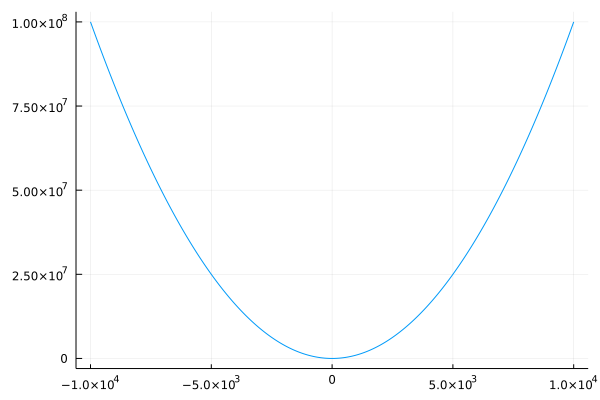

In [49]:
x = -10000:10000
plot(x, x .^ 2, label=false)

Veći broj grafika možemo prikazati na istoj slici, tako što ćemo najpre iscrtati individualne grafike, a onda pozivom **plot** funkcije objediniti sve generisane grafike. U kodu ispod, kreirana su četiri grafika. Parametrom **layout**  prosleđenom torkom (eng. **tuple**) određujemo mrežu rasporeda generisanih grafika.  

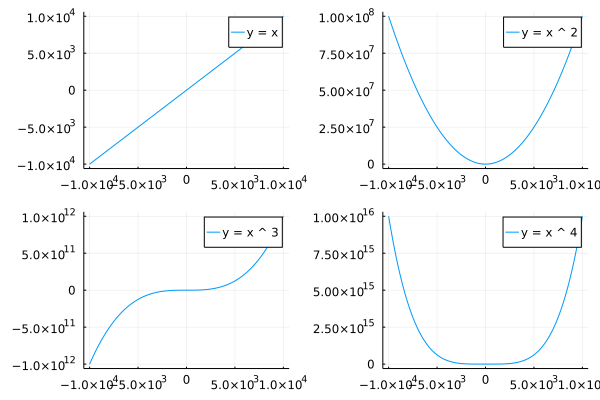

In [50]:
p1 = plot(x, x, label = "y = x")
p2 = plot(x, x .^ 2, label = "y = x ^ 2")
p3 = plot(x, x .^ 3, label = "y = x ^ 3")
p4 = plot(x, x .^ 4, label = "y = x ^ 4")

plot(p1, p2, p3, p4, layout=(2, 2))

Ukoliko definišemo **layout** parametar kao **layout=(4, 1)**, imaćemo sve grafike poravnate u istoj koloni.

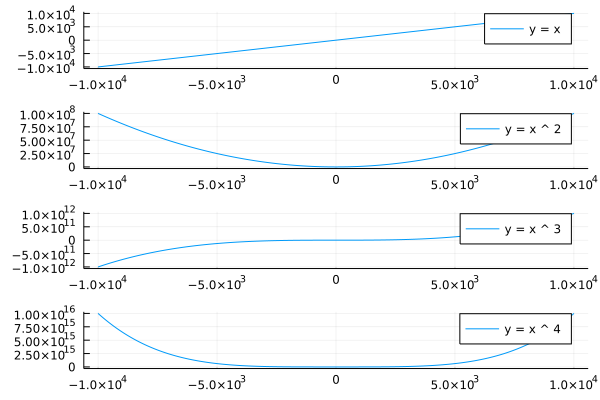

In [51]:
plot(p1, p2, p3, p4, layout=(4, 1))

Preuzimanje **csv** fajla sa odgovarajuće adrese, učitavanje podataka u **DataFrame** objekat i odbacivanje svih opservacija koje sadrže makar jedan atribut sa nedostajućom vrednošću izvršeno je kodom prikazanom u ćeliji ispod.

In [52]:
tmp = tempname()

download("https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt", tmp)

df = dropmissing(CSV.read(tmp, DataFrame, header=0, delim='\t'));

┌ Warning: thread = 1 warning: parsed expected 8 columns, but didn't reach end of line around data row: 8. Ignoring any extra columns on this row
└ @ CSV /Users/ivanzivic/.julia/packages/CSV/CJfFO/src/file.jl:606
┌ Warning: thread = 1 warning: parsed expected 8 columns, but didn't reach end of line around data row: 36. Ignoring any extra columns on this row
└ @ CSV /Users/ivanzivic/.julia/packages/CSV/CJfFO/src/file.jl:606
┌ Warning: thread = 1 warning: parsed expected 8 columns, but didn't reach end of line around data row: 61. Ignoring any extra columns on this row
└ @ CSV /Users/ivanzivic/.julia/packages/CSV/CJfFO/src/file.jl:606
┌ Warning: thread = 1 warning: parsed expected 8 columns, but didn't reach end of line around data row: 69. Ignoring any extra columns on this row
└ @ CSV /Users/ivanzivic/.julia/packages/CSV/CJfFO/src/file.jl:606
┌ Warning: thread = 1 warning: parsed expected 8 columns, but didn't reach end of line around data row: 107. Ignoring any extra columns on this r

Preimenovanje kolona učitanog **DataFrame**-a (da bi se kolonama dalo neki smisleniji naziv umesto **Column1**, **Column2** itd.) obavlja se pozivom funkcije **rename!**.

In [53]:
rename!(df,
  [:Column1 => :area, :Column2 => :perimeter,
  :Column3 => :compactness, :Column4 => :kernel_length,
  :Column5 => :kernel_width, :Column6 => :asymmetry,
  :Column7 => :kernel_groove, :Column8 => :cultivar]
  );

first(df, 10)

10×8 DataFrame
 Row │ area     perimeter  compactness  kernel_length  kernel_width  asymmetry ⋯
     │ Float64  Float64    Float64      Float64        Float64       Float64   ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │   15.26      14.84       0.871           5.763         3.312      2.221 ⋯
   2 │   14.88      14.57       0.8811          5.554         3.333      1.018
   3 │   14.29      14.09       0.905           5.291         3.337      2.699
   4 │   13.84      13.94       0.8955          5.324         3.379      2.259
   5 │   16.14      14.99       0.9034          5.658         3.562      1.355 ⋯
   6 │   14.38      14.21       0.8951          5.386         3.312      2.462
   7 │   14.69      14.49       0.8799          5.563         3.259      3.586
   8 │   16.63      15.46       0.8747          6.053         3.465      2.04
   9 │   16.44      15.25       0.888           5.884         3.505      1.969 ⋯
  10 │   15.26      14.85       0.8696          5.714         3.242      4.543
                                                               2 columns omitted

Prikaz svih kolona koje se nalaze u učitanom **DataFrame** objektu.

In [54]:
names(df)

8-element Vector{String}:
 "area"
 "perimeter"
 "compactness"
 "kernel_length"
 "kernel_width"
 "asymmetry"
 "kernel_groove"
 "cultivar"

Kolona pod nazivom **cultivar** može poslužiti kao kategorički, odnosno klasni atribut. Međutim, ova kolona sadrži tri različite vrednosti tipa **float**.

In [55]:
unique(df.cultivar)

3-element Vector{Float64}:
 1.0
 2.0
 3.0

U kodu ispod, najpre se sve vrednosti iz kolone **cultivar** konvertuju u vrednosti tipa **Int64**, pozivom funkcije **convert**, a zatim se vrši konverzija celobrojnih vrednosti u stringove. Potom, odbacuje se stara kolona **cultivar** koja je sadržala vrednosti tipa **Int64** i kreira se nova kolona sa identičnim imenom kojoj se dodeljuju dobijene vrednosti tipa **String**.

In [56]:
cultivar = string.(convert.(Int64, df.cultivar))
select!(df, Not(:cultivar))
df[:, :cultivar] = cultivar;

In [57]:
typeof(df.cultivar)

Vector{String} (alias for Array{String, 1})

### <center>Dijagrami rasipanja</center>

Dijagrami rasipanja prikazuju samo tačke na grafiku (ne vrše spajanje tačaka). Na ovaj način možemo grafički prikazati raspored opservacija ukoliko iste imaju dva kontinualna atributa. Funkciji **scatter** se najpre prosleđuju x koordinate, a zatim i y koordinate.

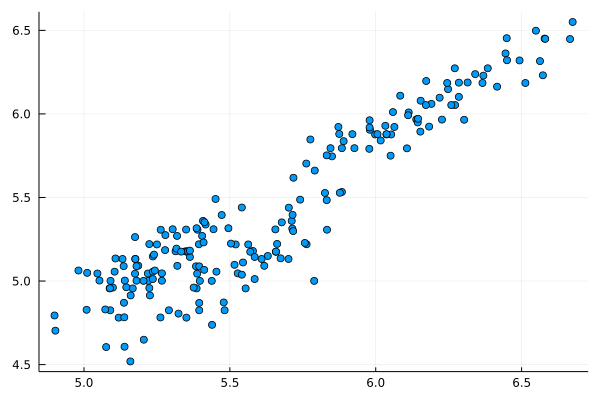

In [58]:
scatter(df.kernel_length, df.kernel_groove, label=false)

Navođenjem parametra **color** **scatter** funkciji možemo da postavimo željenu boju tačaka.

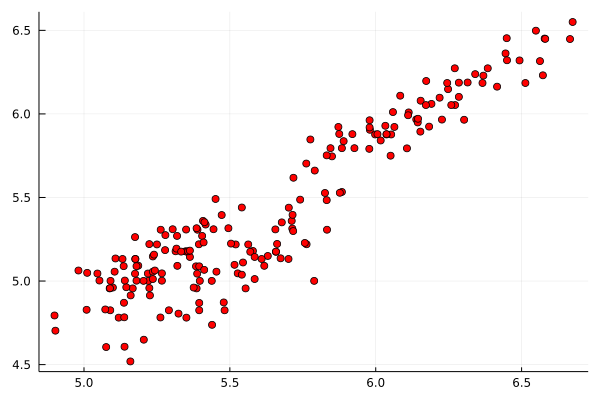

In [59]:
scatter(df.kernel_length, df.kernel_groove, color=:red, label=false)

Parametrom **alpha** možemo uticati na "providnost", odnosno prozirnost tačaka prikazanih na grafiku. Ovaj parametar se kreće od 0.0 do 1.0 i što je vrednost manja to je transparentnost tačaka prikazanih na grafiku veća.

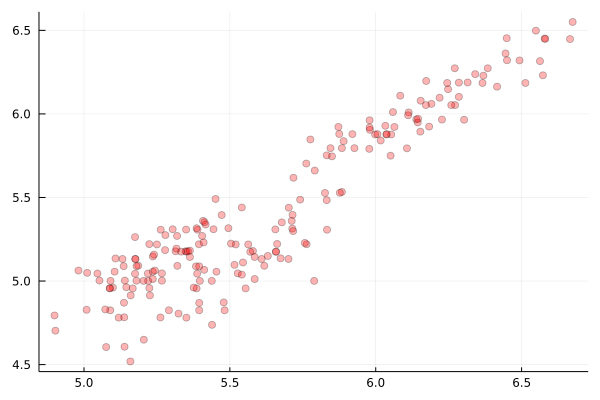

In [60]:
scatter(df.kernel_length, df.kernel_groove, color=:red, alpha=0.3, label=false)

Ukoliko parametru frame prosledimo simbol **:box**, grafik će biti uokviren.

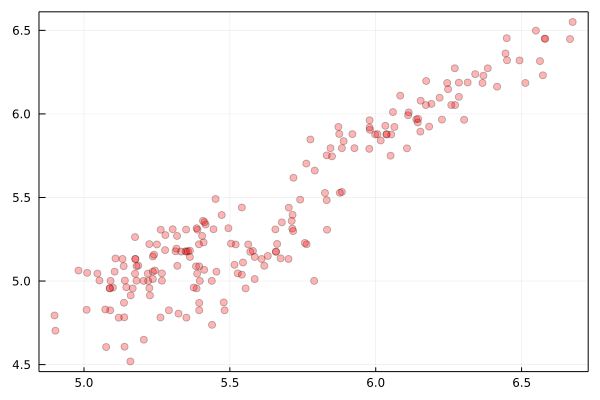

In [61]:
scatter(df.kernel_length, df.kernel_groove, color=:red, alpha=0.3, frame=:box, label=false)

Prosleđivanjem vrednosti **true** parametru **smooth**, **scatter** funkcija će aproksimirati pravu liniju pomoću linearne regresije, tako da minimizuje grešku kvadrata rastojanja. Takođe parametrima **linewidth** i **linecolor** može se uticati na debljinu i boju linije. 

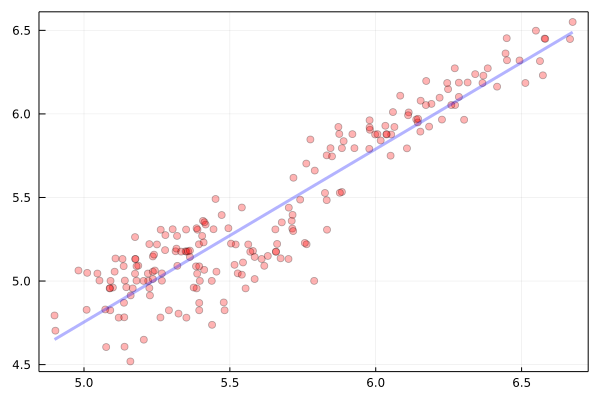

In [62]:
scatter(df.kernel_length, df.kernel_groove, 
        color=:red, alpha=0.3,
        smooth=true, linewidth=3, linecolor=:blue ,
        frame=:box, label="")

Navođenjem funkcije **xlabel!**, **ylabel!** i **title!** može se postaviti naslov na odgovarajućim osama, odnosno celog grafika. Treba voditi računa da ukoliko želimo da funkcija koju pozivamo naknadno vrši iscrtavanje na istom grafiku (ne prebriše grafike koje su nacrtale funkcije pozvane pre nje), obavezno navodimo karakter "!" iza naziva funkcije.

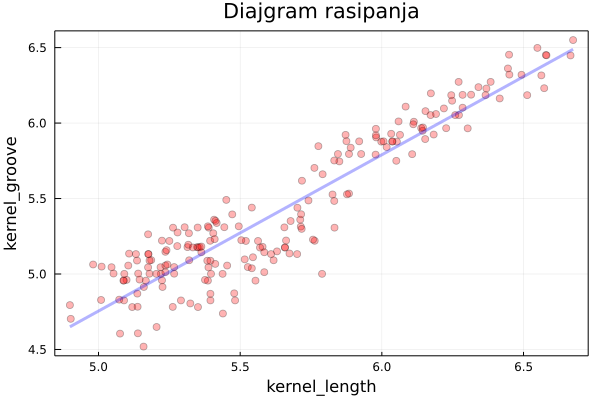

In [63]:
scatter(df.kernel_length, df.kernel_groove, 
        color=:red, alpha=0.3,
        smooth=true, linewidth=3, linecolor=:blue ,
        frame=:box, label="")
xlabel!("kernel_length")
ylabel!("kernel_groove")
title!("Diajgram rasipanja")

Nekada možemo poželeti da opservacije prikazane dijagramom rasipanja sadrže različite boje za različite klase. Prosleđivanjem vektora koji sadrži oznake labela, odnosno klasa parametru **marker_z** **scatter** funkcije, postižemo označavane opservacija različitim bojama, u zavisnosti od toga koja opservacija kojoj klasi pripada.

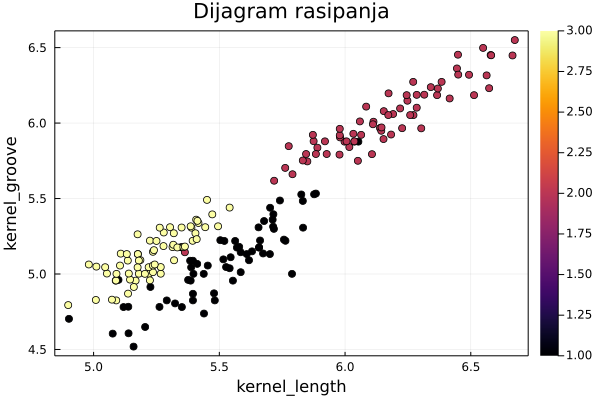

In [64]:
class = df.cultivar 

scatter(df.kernel_length, df.kernel_groove, 
        marker_z=convert(Array, parse.(Int64, cultivar)),
        frame=:box, label=false)
xlabel!("kernel_length")
ylabel!("kernel_groove")
title!("Dijagram rasipanja")

### <center>Bar grafici</center>

Bar grafici su pogodni za prikazivanje učestanosti, odnosno broja pojavljivanja vrednosti u okviru odgovarajuće kategoričke promenljive (atributa). Visina najdužeg "štapića" ukazuje na to da se vrednost koja se nalazi na x osi javlja najveći broj puta u okviru promenljive.

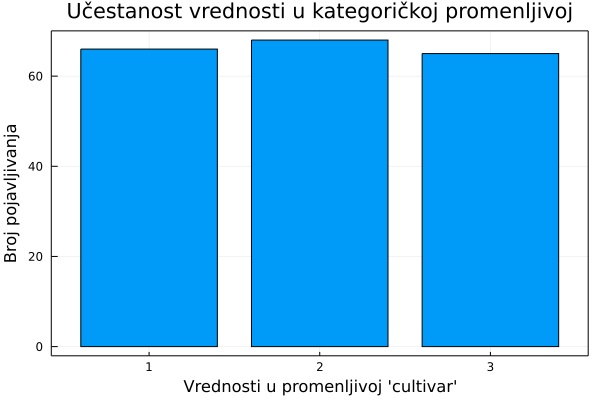

In [65]:
values_and_count = StatsBase.countmap(df.cultivar)
bar(collect(keys(values_and_count)), collect(values(values_and_count)), label=false, frame=:box)
title!("Učestanost vrednosti u kategoričkoj promenljivoj")
xlabel!("Vrednosti u promenljivoj 'cultivar'")
ylabel!("Broj pojavljivanja")

### <center> Histogram </center>

Za razliku od bar grafika, koji prikazuju učestanost pojavljivanja vrednosti u okviru kategoričke promenljive, histogrami prikazuju učestanost pojavljivanja vrednosti u okviru neke kontinualne promenljive po navedenim intervalima (binovima). Za potrebe iscrtavanja histograma u biblioteci **Plots** postoji funkcija **histogram**.

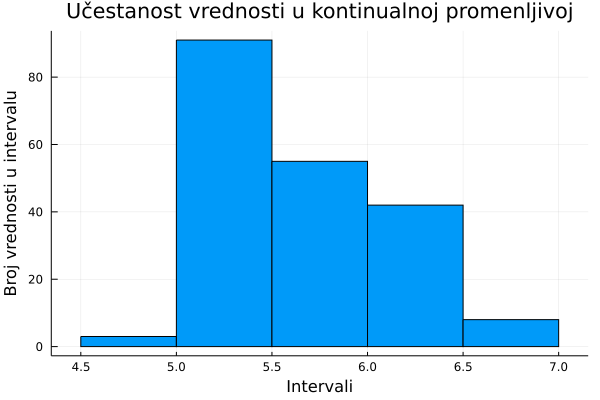

In [66]:
histogram(df.kernel_length, label=false)
title!("Učestanost vrednosti u kontinualnoj promenljivoj")
xlabel!("Intervali")
ylabel!("Broj vrednosti u intervalu")

Postavljanjem parametra **bin** na odgovarajuću celobrojnu vrednost, određujemo broj intervala na koje će **Plots** biblioteka izdeliti histogram.

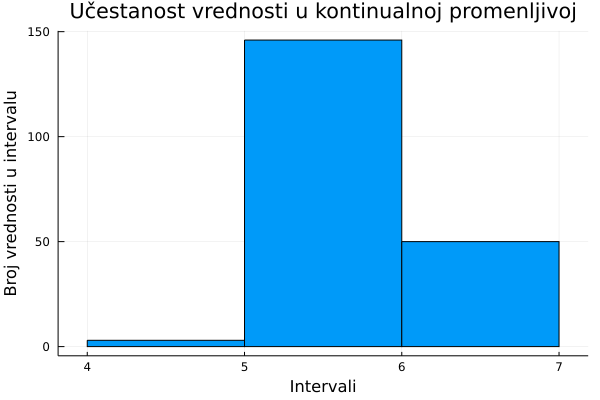

In [67]:
histogram(df.kernel_length, bins=3, label=false)
title!("Učestanost vrednosti u kontinualnoj promenljivoj")
xlabel!("Intervali")
ylabel!("Broj vrednosti u intervalu")

Ukoliko umesto celobrojne vrednosti parametru **bins** prosledimo vektor celobrojnih vrednosti, **Plots** biblioteka će smatrati da su elementi vektora intervali na koje želimo da izdelimo histogram.

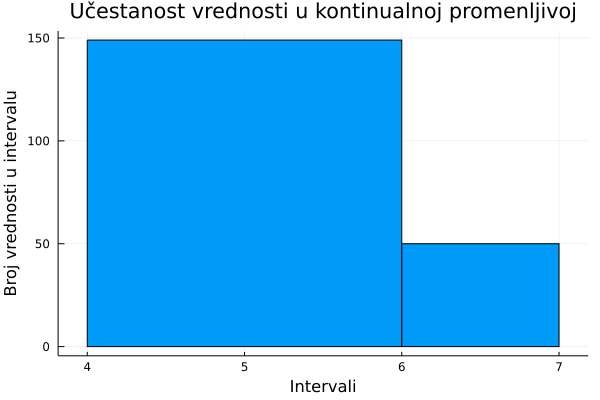

In [68]:
histogram(df.kernel_length, bins=[4, 6, 7], label=false)
title!("Učestanost vrednosti u kontinualnoj promenljivoj")
xlabel!("Intervali")
ylabel!("Broj vrednosti u intervalu")

### <center>Kućice (eng. box plots)</center>

Kućice pružaju mogućnost grafičkog prikaza raspodele vrednosti kontinualne promenljive u odnosu na:

- 25. percentil (prvi kvartal),
- 50. percentil odnosno medijan (drugi kvartal),
- 75. percentil (treći kvartal),
- minimum i
- maksimum.

Minimum i maksimum predstavljaju donji, odnosno gornji "brk" kućice. Sve vrednosti koje su manje od minimuma, osnosno veće od maksimuma, tretiraju se kao elementi van granica (eng. **outliers**). Međukvartalna razlika predstavlja razliku 75. i 25. percentila. Pomenuta razlika se koristi za dobijanje minimuma, odnosno maksimuma. Minimalna vrednost se dobija tako što se od 25. percentila oduzme međukvartalna razlika uvećana (najčešće) 1.5 puta, a maksimum, tako što se 75. percentilu doda međukvartalna razlika uvećana takođe 1.5 puta.
Na kućici prikazanoj na slici ispod, ne postoje elementi van granica. U slučaju da elementi van granica postoje, isti bi bili prikazani tačkama ispod, odnosno iznad "brkova".

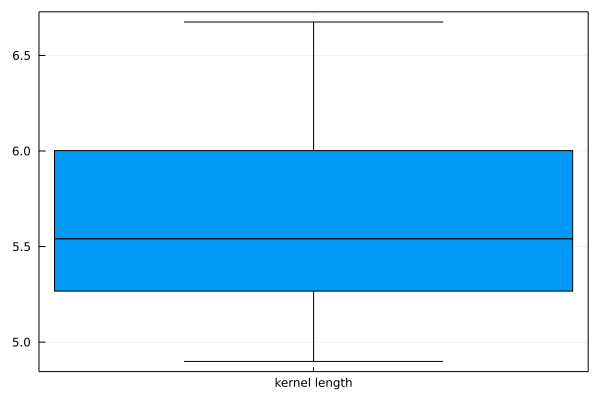

In [69]:
boxplot(["kernel length"], df.kernel_length, label=false, frame=:box)

Ukoliko pomoću kućica prikažemo raspodelu promenljive **kernel_length** učitanog **DataFrame** objekta, 
možemo videti da se ispod donjeg "brka" nalazi određen broj elemenata van granica (elemenata manjih od minimuma).

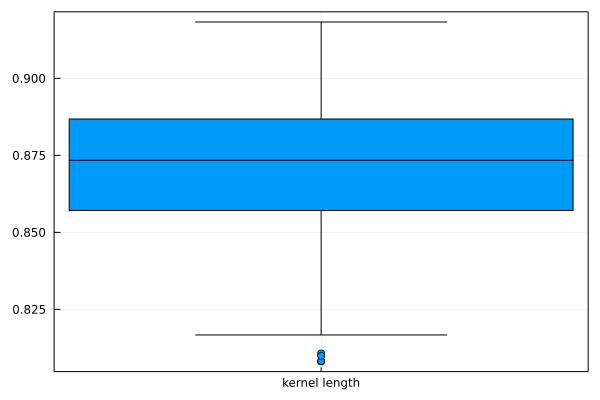

In [70]:
boxplot(["kernel length"], df.compactness, label=false, frame=:box)

Veći broj kućica možemo takođe prikazati na istoj slici. Kodom koji se nalazi u ćeliji ispod, kreiraju se tri kućice na istoj slici, gde svaka pojedinačna kućica predstavlja raspodelu odgovarajuće kontinualne promenljive, čiji je naziv naveden na x osi grafika.

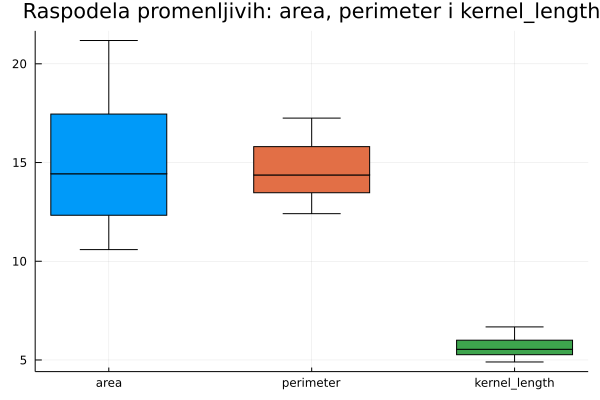

In [71]:
boxplot(["area"], df.area, label=false)
boxplot!(["perimeter"], df.perimeter, label=false)
boxplot!(["kernel_length"], df.kernel_length, label=false)
title!("Raspodela promenljivih: area, perimeter i kernel_length")

**Plots** biblioteku možemo upotrebiti da prikažemo raspodelu kontinualne promenljive pomoću grafika kućica u odnosu na odgovarajuću kategoričku promenljivu. U kodu prikazanom u ćeliji ispod, prikazana je raspodela promenljive **kernel_length** učitanog **DataFrame**-a u odnosu na kategoričku promenljivu **cultivar**. Promenljiva **cultivar** sadrži tri različite vrednosti, pa se iz tog razloga na donjoj slici nalaze tri kućice.
Tačke iznad i ispod gornjeg, odnosno donjeg "brka" ukazuju da postoje elementi van granica.

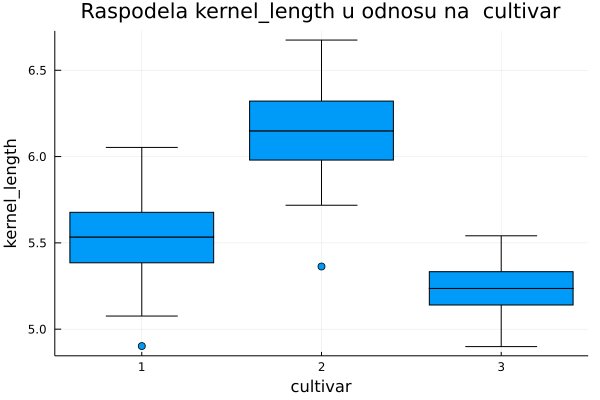

In [72]:
boxplot(df.cultivar, df.kernel_length, label=false)
title!("Raspodela kernel_length u odnosu na  cultivar")
xlabel!("cultivar")
ylabel!("kernel_length")

### <center>Violine</center>

Violine predstavljaju određenu alternativu kućicama. U kodu ispod, prikazana je raspodela promenljive **kernel_length** koja se nalazi u učitanom **DataFrame** objektu.

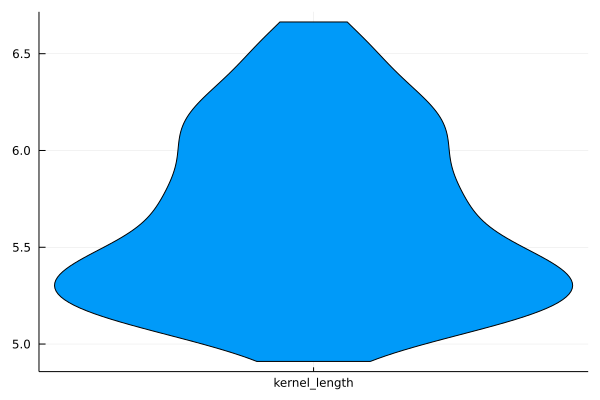

In [73]:
violin(["kernel_length"], df.kernel_length, label=false)

Gotovo identično prikazu većeg broja kućica na istom grafiku, isto se može učiniti i sa violin graficima.

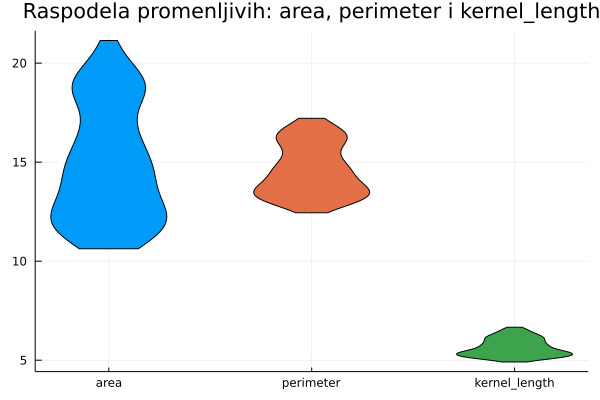

In [74]:
violin(["area"], df.area, label=false)
violin!(["perimeter"], df.perimeter, label=false)
violin!(["kernel_length"], df.kernel_length, label=false)
title!("Raspodela promenljivih: area, perimeter i kernel_length")

Violinama možemo prikazati i raspodelu kontinualne promenljive u odnosu na navedenu kategoričku promenljivu (kao i u slučaju kućica).

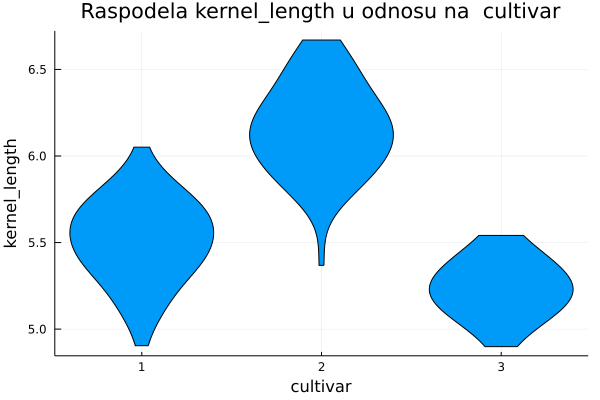

In [75]:
violin(df.cultivar, df.kernel_length, label=false)
title!("Raspodela kernel_length u odnosu na  cultivar")
xlabel!("cultivar")
ylabel!("kernel_length")

### <center>Aproksimacija funkcije gustine verovatnoće</center>

Kod prikazan u ćeliji ispod generiše krivu koja aproksimira funkciju gustine verovatnoće kontinualne promenljive **kernel_length**. Kao što možemo primetiti, vrednosti u promenljivoj teže ka normalnoj raspodeli. Ukoliko bismo imali veći broj prikupljenih vrednosti za datu promenljivu, kriva bi sve više podsećala na Gausovu krivu. 

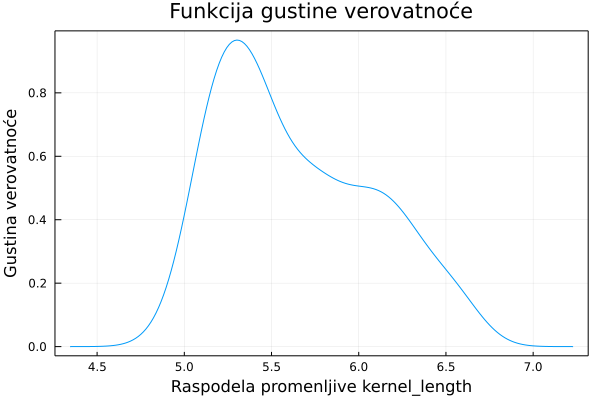

In [76]:
density(df.kernel_length, label="", frame=:box)
title!("Funkcija gustine verovatnoće")
xlabel!("Raspodela promenljive kernel_length")
ylabel!("Gustina verovatnoće")

Na grafiku ispod, prikazana je gustina verovatnoće promenljive **kernel_length** u odnosu na kategoričku promenljivu **cultivar**. Promenljiva **cultivar** sadrži tri različite vrednosti (tri različite labele) pa su zbog toga na grafiku prikazane tri krive. Klase 1, 2, i 3 koje su nalaze kao moguće labele u atributu **cultivar** prikazane su odgovarajućom bojom i oznakom u legendi koja se nalazi u desnom gornjem uglu grafika.

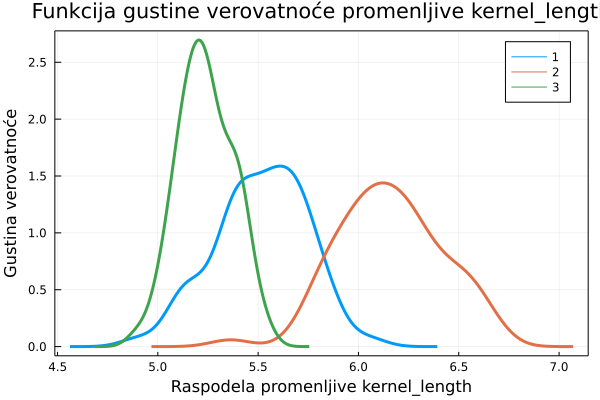

In [77]:
density(df.kernel_length, group=df.cultivar, label=["1" "2" "3"], frame=:box, linewidth=3)
title!("Funkcija gustine verovatnoće promenljive kernel_length")
xlabel!("Raspodela promenljive kernel_length")
ylabel!("Gustina verovatnoće")

## <center> Vizuelizacija podataka upotrebom biblioteke VegaLite.jl </center>

**VegaLite.jl** je još jedna biblioteka u programskom jeziku **Julia** koja se koristi u svrhu vizuelizacije podataka. Pomenuta biblioteka upotrebljava **VegaLite** sintaksu, koja nije svojstvena isključivo **Julia** programskom jeziku, već je primenom deklarativne **JSON** sintakse koju biblioteka koristi, omogućeno implementiranje iste u okviru različitih tehnologija (programskih jezika).

In [78]:
using Pkg
using VegaLite
using Distributions
using DataFrames
using Random

- Pozivom funkcije **seed** koja je definisana u **Random** paketu obezbeđujemo da se svakim pozivom funkcije **rand** (koja je upotrebljena kao pomoćna funkcija za generisanje nezavisnih vrednosti) generišu iste nasumične vrednosti.
- Nezavisna promenljiva (eng. **independent**) će sadržati realne vrednosti, počevši od 0.0 pa sve do 9.9, sa povećanjem u koracima od 0.1 (ukupno 100 vrednosti).
- Zavisna promenljiva (eng. **dependent**) biće formirana pomoću funkcije **rand** koja će generisati 100 nasumičnih vrednosti u opsegu od 0.0 do 1.0 i pokomponentno ih dodati nizu nezavisnih vrednosti, odnosno nezavisnoj promenljivoj. 

In [79]:
Random.seed!(12)
independent = 0:0.1:9.9
dependent = independent .+ rand(length(independent));

- Atribut mark **@vlplot** markoa, određuje koji tip grafika je u pitanju. Pošto smo stavili **:point** kao vrednost koju prosleđujemo **mark** parametru u pitanju će biti dijagram rasipanja.
- Atribut **color** određuje boju tačaka na grafiku
- Parametru **x** prosleđuje se niz čije će pojedinačne vrednosti predstavljati koordinate x ose, a identično ovome, promenljivoj y se prosleđuje niz čije će vrednosti biti koordinate y ose.
- Parametrima **width** i **height** određuje se veličina grafika.

### <center>Dijagrami rasipanja</center>

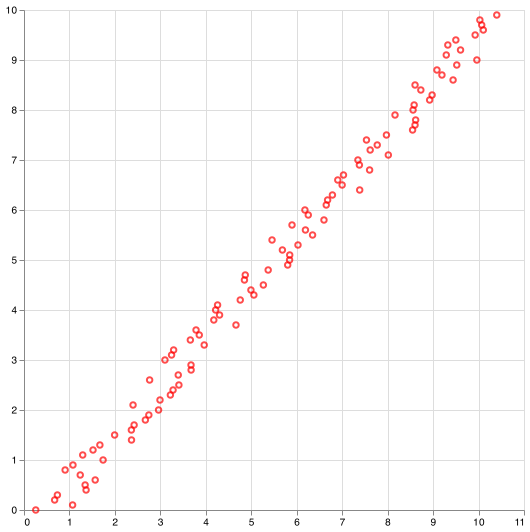

In [80]:
@vlplot(
    mark = {:point, color = :red},
    x = dependent,
    y = independent,
    width = 500,
    height = 500
)

Pozivom **rand** funkcije i prosleđivanjem polja od dva elementa ("Yes" i "No") kao prvog argumenta i broja 100 kao drugog argumenta, pomenuta funkcija će generisati 100 nasumično odabranih vrednosti iz prosleđenog niza. Ovim postižemo generisanje kategoričkog atributa koji može predstavljati klase u **DataFrame**-u.

In [81]:
group = rand(["Yes", "No"], 100);

U kodu ispod, parametru **color** prosleđena je promenljiva koja sadrži oznake klasa kojima opservacije pripadaju. Na osnovu pripadnosti klasama, **VegaLite** biblioteka će označiti opservacije različitim bojama. Biblioteka će uvesti onoliko boja koliko ima različitih klasa (vrednosti) u promenljivoj koja se prosleđuje **color** parametru. Legenda, koja se nalazi u gornjem desnom uglu grafika, prikazuje koja klasa je kodirana kojom bojom.

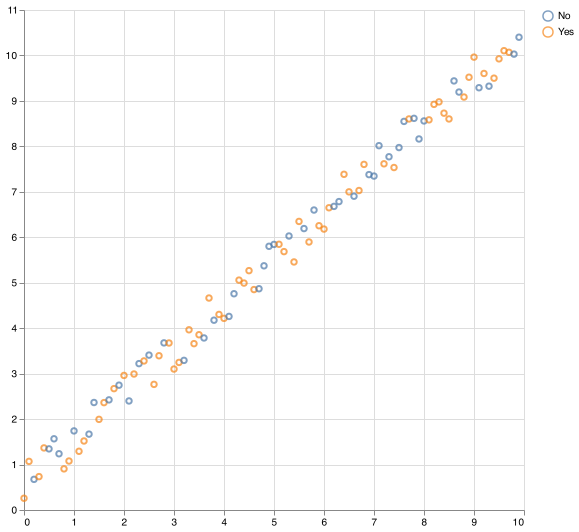

In [82]:
@vlplot(
    mark = :point,
    x = independent,
    y = dependent,
    color = group,
    width = 500,
    height = 500
)

Ukoliko **color** parametar zamenimo **column** parametrom, **VegaLite** biblioteka će to shvatiti kao da želimo da se najpre izvrši grupisanje podataka na osnovu vrednosti koje se nalaze u vektoru koji se prosleđuje **column** parametru, a nakon toga prikaže dijagram rasipanja svake grupe pojedinačno. Budući da vektor koji prosleđujemo **column** parametru sadrži samo dve vrednosti ("Yes" i "No"), **VegaLite** biblioteka će generisati dva grafika.

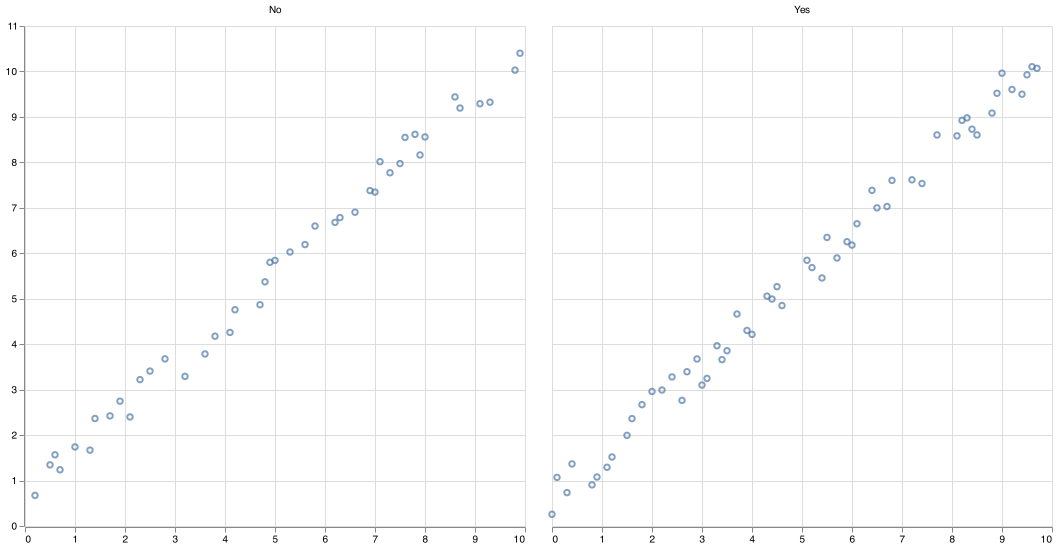

In [83]:
@vlplot(
    mark = :point,
    x = independent,
    y = dependent,
    column = group,
    width = 500,
    height = 500
)

- Funkcijom **rand** kojoj prosleđujemo raspon **10:20** kao prvi argument i **100** kao drugi argument, postižemo generisanje niza koji sadrži 100 elemenata. Svaki element se bira nasumično u opsegu od 10 do 20.
- Pozivom funkcije **rand** u drugoj liniji koda i prosleđivanjem vektora koji sadrži tri elementa **(1, 2, 3)** na mestu prvog argumenta, i vrednosti **100** na mestu drugog argumenta, postiže se generisanje vektora koji sadrži 100 elemenata. Svaki element se nasumično bira u vektoru koji je naveden kao prvi argument.

In [84]:
scale = rand(10:20, 100);
grade = rand([1, 2, 3], 100);

U kodu ispod, kreiran je **DataFrame** objekat koji sadrži kolone: **Independent**, **Dependent**, **Grade**, **Scale** i **Group**. Jedino je promenljiva **Group** kategorička (u tabeli ispod koja štampa **DataFrame** nakon formiranja istog mogu se videti i tipovi odgovarajućih kolona, kao i da vrednosti kolone **Group** **DataFrame** objekat tretira kao **String**).

In [85]:
df = DataFrame(
    Independent = independent,
    Dependent = dependent,
    Grade = grade,
    Scale = scale,
    Group = group
);

first(df, 10)

10×5 DataFrame
 Row │ Independent  Dependent  Grade  Scale  Group  
     │ Float64      Float64    Int64  Int64  String 
─────┼──────────────────────────────────────────────
   1 │         0.0   0.25851       2     17  Yes
   2 │         0.1   1.06925       1     10  Yes
   3 │         0.2   0.674177      1     12  No
   4 │         0.3   0.734506      1     13  Yes
   5 │         0.4   1.36579       3     19  Yes
   6 │         0.5   1.34484       2     20  No
   7 │         0.6   1.56636       3     15  No
   8 │         0.7   1.23726       2     19  No
   9 │         0.8   0.904797      3     18  Yes
  10 │         0.9   1.07722       1     13  Yes

Vektori koji se prosleđuju kao argumenti parametrima **x** i **y**, makrou **@vlplot**, biblioteke **VegaLite**, ne moraju biti "zasebni" nizovi. Operatorom **|>** možemo postići da se **DataFrame** objekat (objekat koji smo kreirali u ćeliji iznad) prosledi makrou, a kao argumente parametrima **x** i **y** makroa prosledimo kolone koje se nalaze u **DataFrame** objektu. Parametru **x**, prosleđena je kolona **Independent**, a parametru **y** kolona **Dependent** **DataFrame** objekta.

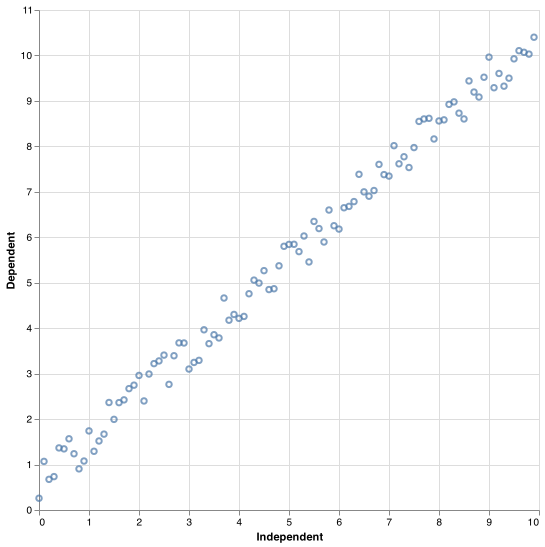

In [86]:
df |> @vlplot(
    mark = :point,
    x = :Independent,
    y = :Dependent,
    width = 500,
    height = 500
)

Parametrom **color**, možemo postići da se tačke na grafiku prikažu željenom bojom. Sve tačke biće obojene naznačenom bojom.

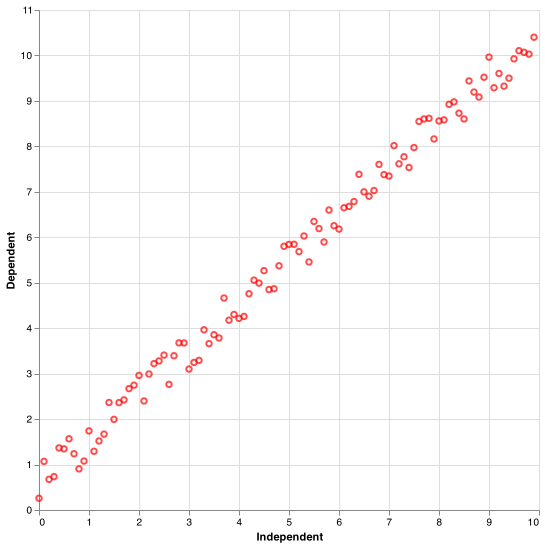

In [87]:
df |> @vlplot(
    mark = {:point, color="red"},
    x = :Independent,
    y = :Dependent,
    width = 500,
    height = 500
)

Parametrom **background** možemo postaviti željenu boju pozadine grafika.

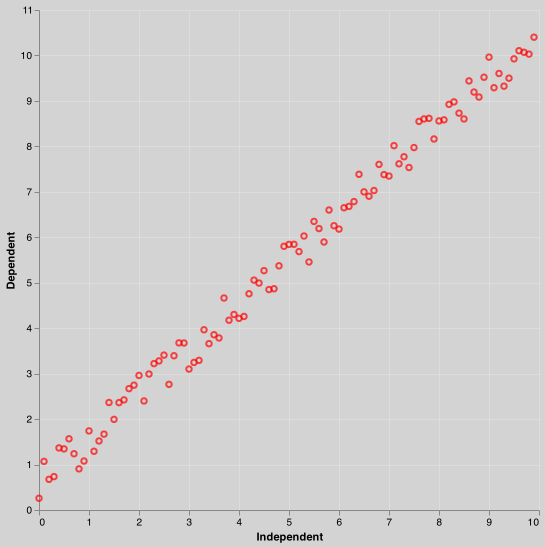

In [88]:
df |> @vlplot(
    background = "lightgray",
    mark = {:point, color="red"},
    x = :Independent,
    y = :Dependent,
    width = 500,
    height = 500
)

Takođe, nazive kolona **DataFrame** objekta koje želimo da prosledimo **x** i **y** parametrima možemo navoditi kao stringove, za razliku od primera iznad, gde smo nazive kolona navodili kao simbole.  

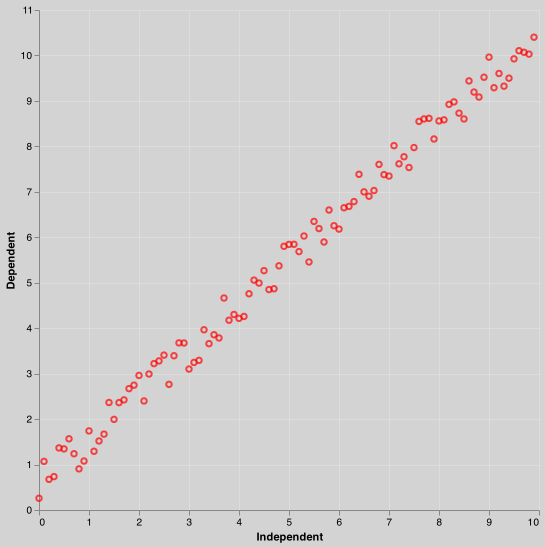

In [89]:
df |> @vlplot(
    background = "lightgray",
    mark = {:point, color="red"},
    x = "Independent",
    y = "Dependent",
    width = 500,
    height = 500
)

Prosleđivanje stringa **title** parametru, obezbeđujemo željeni naslov grafika koji će se štampati na vrhu istog. Takođe, svakoj osi možemo dodeliti naziv tako što navedemo parametar **title** unutar vitičastih zagrada **x**, odnosno **y** parametra.

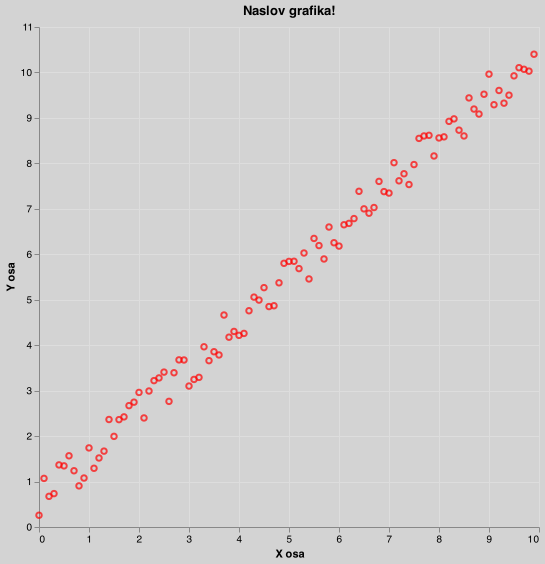

In [90]:
df |> @vlplot(
    background = "lightgray",
    mark = {:point, color="red"},
    x = {:Independent, title = "X osa"},
    y = {:Dependent, title = "Y osa"},
    title = "Naslov grafika!",
    width = 500,
    height = 500
)

Prosleđivanjem odgovarajućeg naziva kolone **color** parametru **@vlplot** makroa, obaveštavamo **VegaLite** biblioteku da označena kolona sadrži oznake klase opservacija. Broj različitih vrednosti unutar navedene kolone ujedno označava i broj klasa. **VegaLite** biblioteka će dodeliti onoliko različitih boja opservacijama prilikom prikazivanja istih na grafiku koliko ima različitih klasa.

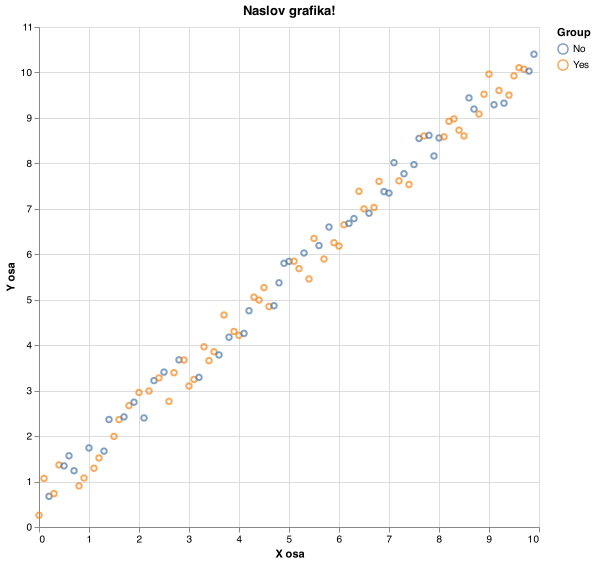

In [91]:
df |> @vlplot(
    mark = {:point, color="red"},
    x = {:Independent, title = "X osa"},
    y = {:Dependent, title = "Y osa"},
    color = :Group,
    title = "Naslov grafika!",
    width = 500,
    height = 500
)

Ukoliko atributu **color** prosledimo kolonu koja je numeričkog tipa (u slučaju ispod prosleđena je kolona **Grade** koju **DataFrame** objekat prepoznaje kao **Int64**), na desnoj strani grafika će se umesto legende koja označava klase pripadnosti opservacija prikazati numerička skala i nijanse boje, koje predstavljaju različite vrednosti. Što je vrednost u koloni **Grade** veća, to je boja na skali tamnija i tačka koja predstavlja opservaciju na grafiku tamnije boje.

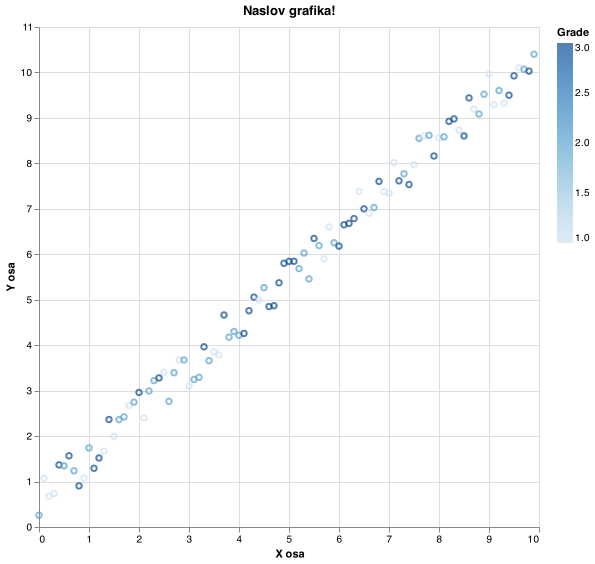

In [92]:
df |> @vlplot(
    mark = {:point, color="red"},
    x = {:Independent, title = "X osa"},
    y = {:Dependent, title = "Y osa"},
    color = :Grade,
    title = "Naslov grafika!",
    width = 500,
    height = 500
)

Oznaka **:n** u atributu **color = "Grade:n** označava da želimo da se **Grade** kolona posmatra kao nominalni artibut, iako taj atribut **DataFrame** prepoznaje kao numerički (**Int64**). Sada će se umesto brojne skale na desnoj strani grafika naći legenda koja prikazuje kojom bojom je kodirana svaka odgovarajuća klasa prosleđena u atributu **Grade**.

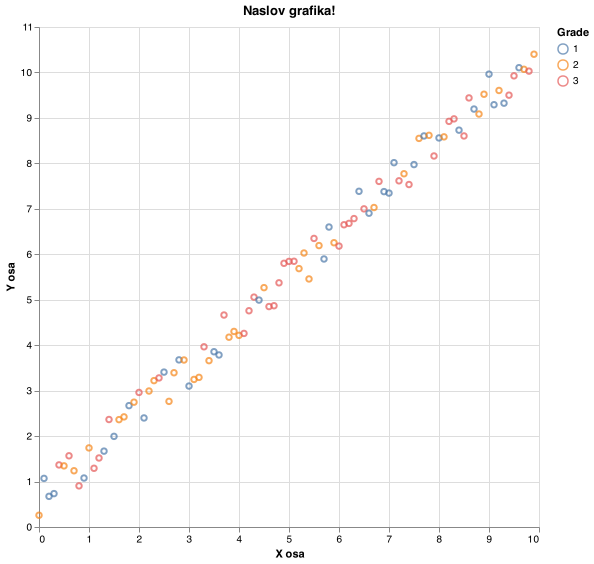

In [93]:
df |> @vlplot(
    mark = {:point, color="red"},
    x = {:Independent, title = "X osa"},
    y = {:Dependent, title = "Y osa"},
    color = "Grade:n",
    title = "Naslov grafika!",
    width = 500,
    height = 500
)

U primeru ispod, prikazana su dodatna podešavanja koja demonstriraju koliko je **VegaLite** biblioteka fleksibilna po pitanju detaljnih prilagođavanja grafika potrebama.
- Naslovu grafika dodeljena je plava boja.
- Ispod naslova dodat je i podnaslov, postavljena željena boja i navedena veličina slova u pikselima.
- Isključene su mreže (eng. **grids**), tako da sada grafik više ne prikazuje horizontalne i vertikalne linije na svojoj površini.
- Na x i y osama je dodatim naslovima promenjena podrazumevana boja.

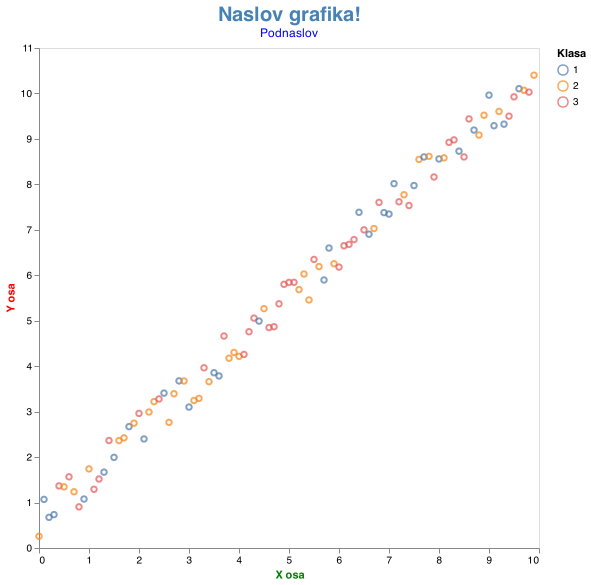

In [94]:
df |> @vlplot(
    mark = {:point, color="red"},
    x = {field = :Independent, axis = {title = "X osa", titleColor = "green", grid = false}},
    y = {field = :Dependent, axis= {title = "Y osa", titleColor = "red", grid = false}},
    color = {"Grade:n", legend = {title = "Klasa"}},
    title = {text = "Naslov grafika!", color = "steelblue", fontSize = 20, subtitle = "Podnaslov", subtitleColor = "blue"},
    width = 500,
    height = 500
)

Formalniji (detaljniji) način navođenja argumenata koje želimo da prosledimo makrou je zasebnim navođenjem **mark** parametra, kao i zasebnim navođenjem **encoding** parametra. Parametrima **x** i **y** možemo putem parametra **field** na formalniji način dodeliti kolonu **DataFrame** objekta, parametrom **title** odrediti tekst kojim će biti označene ose, a parametrom **type** eksplicitno definisati tip kojim želimo da **VegaLite** biblioteka posmatra navedene kolone.

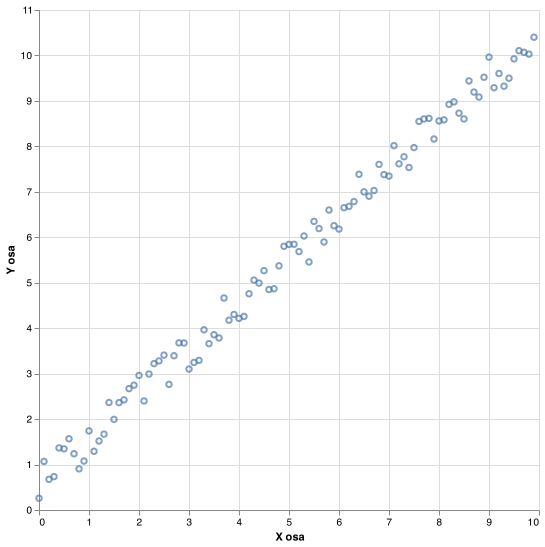

In [95]:
df |> @vlplot(
    mark = :point,
    encoding = {x = {field = :Independent, title = "X osa", type = :quantitative}, 
                y = {field = :Dependent, title = "Y osa", type = :quantitative}},
    width = 500,
    height = 500
)

### <center> Bar grafik </center>

U primeru ispod, prikazan je bar grafik, koji je upotrebljen u svrhu grafičkog prikaza broja pojavljivanja vrednosti u okviru **Group** kategoričke promenljive. Na grafiku se mogu videti dva "štapića", koja ukazuju na to da se u okviru navedene promenljive pojavljuju samo dve različite vrednosti. Ove vrednosti su označene na x osi (Yes i No), dok je na y osi prikazan broj pojavljivanja navedenih vrednosti u okviru promenljive.

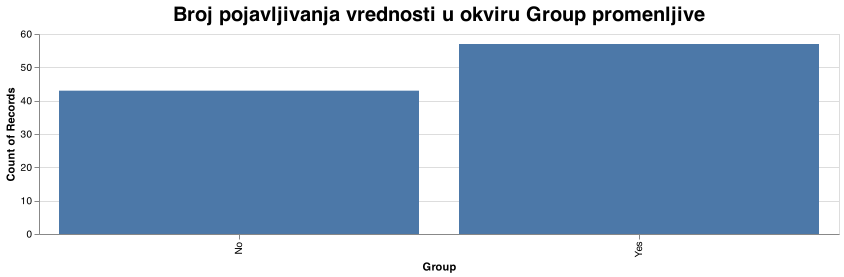

In [96]:
df |> @vlplot(
    mark = :bar,
    x = :Group,
    y = "count()",
    title = {text = "Broj pojavljivanja vrednosti u okviru Group promenljive", fontSize = 20},
    width = 800,
    heigth = 800
)

Oznake na x osi kategoričkih promenljivih **VegaLite** biblioteka podrazumevano prikazuje rotirane za 90 stepeni. Jednostavnim dodavanjem **labelAngle** atributa i postavljanjem istog na 0 obezbeđujemo da oznake na x osi budu prikazane vodoravno. 

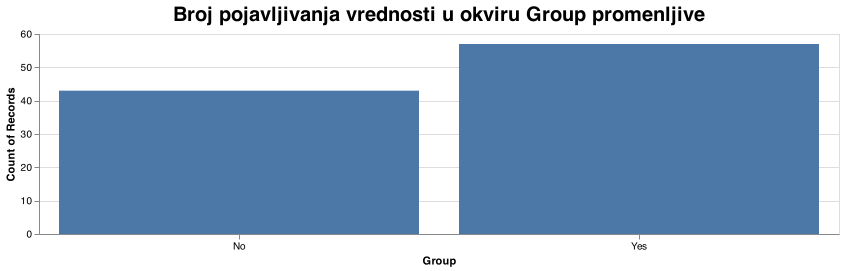

In [97]:
df |> @vlplot(
    mark = :bar,
    x = {:Group, axis = {labelAngle = 0}},
    y = "count()",
    title = {text = "Broj pojavljivanja vrednosti u okviru Group promenljive", fontSize = 20},
    width = 800,
    heigth = 800
)

Ukoliko navedemo **color** parametar i prosledimo mu naziv promenljive čije vrednosti "prebrojavamo", **VegaLite** biblioteka će se potruditi da svakom štapiću unutar bar grafika dodeli različitu boju i na desnoj strani grafika prikazati legendu sa oznakama koja boja kojoj klasi odnosno vrednosti pripada.

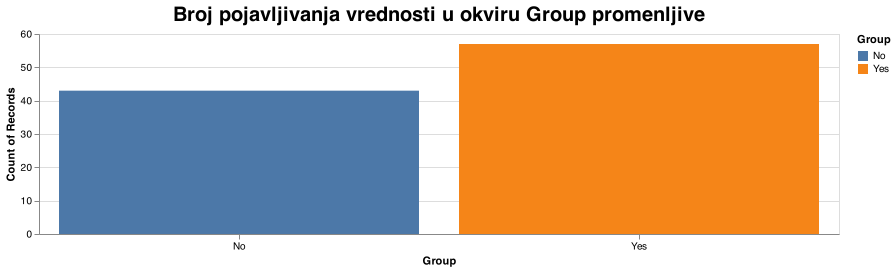

In [98]:
df |> @vlplot(
    mark = :bar,
    x = {:Group, axis = {labelAngle = 0}},
    y = "count()",
    title = {text = "Broj pojavljivanja vrednosti u okviru Group promenljive", fontSize = 20},
    color = {"Group"},
    width = 800,
    heigth = 800
)

Ukoliko želimo da eksplicitno navedemo boje štapića u okviru bar grafika, to možemo učiniti navođenjem naziva boja u okviru **range** parametra, kao što je prikazano u kodu ispod.

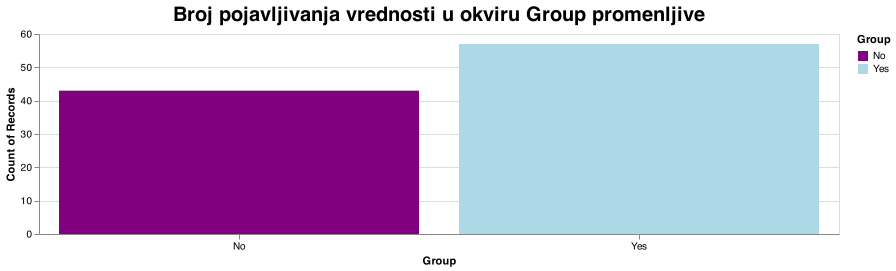

In [99]:
df |> @vlplot(
    mark = :bar,
    x = {:Group, axis = {labelAngle = 0}},
    y = "count()",
    title = {text = "Broj pojavljivanja vrednosti u okviru Group promenljive", fontSize = 20},
    color = {"Group", scale = {range = ["purple", "lightblue"]}},
    width = 800,
    heigth = 800
)

### <center> Histogram </center>

U primeru ispod demonstrirana je mogućnost biblioteke **VegaLite** da generiše histograme. U navedenom primeru, putem histograma, prikazana je frekvencija pojavljivanja kontinualnih vrednosti po intervalima u okviru promenljive **Dependent** **DataFrame**-a koji smo kreirali. Histogram se kreira navodeći **:bar** simbol, koji se prosleđuje **mark** parametru **@vlplot** makroa, ali se u parametru **x** u njegovom podparametru **bin** prosleđuje vrednost **true**, što predstavlja naznaku da želimo histogram umesto **bar** grafičkog prikaza.

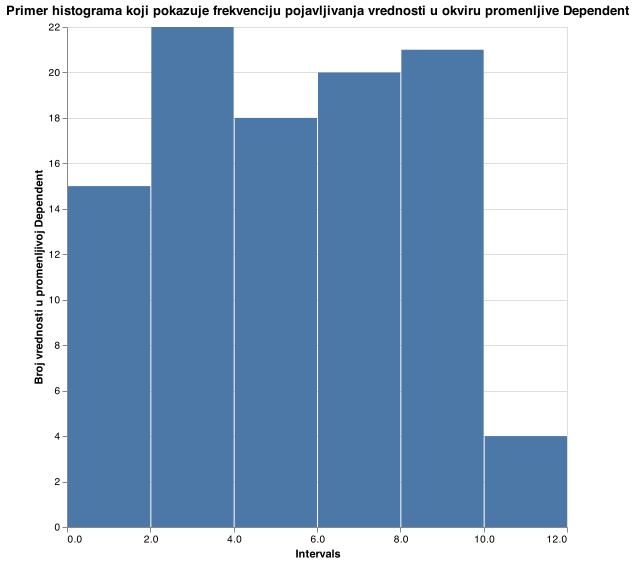

In [100]:
df |> @vlplot(
    mark = :bar,
    x = {:Dependent, bin = true, axis = {title = "Intervals"}},
    y = {"count()", axis = {title = "Broj vrednosti u promenljivoj Dependent"}},
    title = "Primer histograma koji pokazuje frekvenciju pojavljivanja vrednosti u okviru promenljive Dependent", 
    width = 500,
    height = 500
)

U primeru histograma iznad, **VegaLite** biblioteka "sama" određuje broj intervala koje će prikazati. Mi možemo navesti željeni broj intervala tako što podparametru **maxbins** parametra **bin** dodelimo željenu celobrojnu vrednost. U primeru ispod, naveden je broj 3, tako da će **VegaLite** biblioteka na grafiku prikazati broj pojavljivanja vrednosti u okviru **Dependent** promenljive u okviru 3 intervala. 

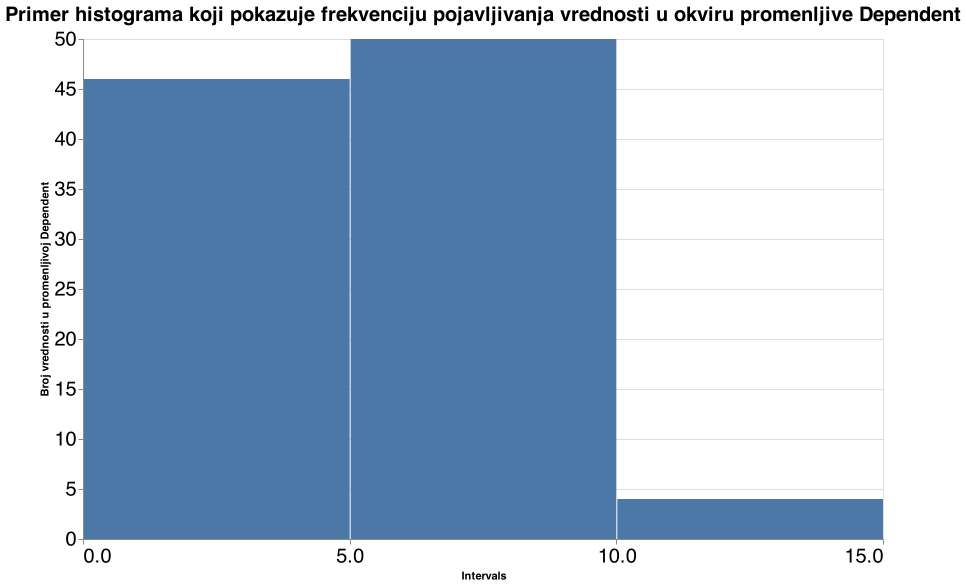

In [101]:
df |> @vlplot(
    mark = :bar,
    x = {:Dependent, bin = {maxbins = 3}, axis = {title = "Intervals", labelFontSize = 20}},
    y = {"count()", axis = {title = "Broj vrednosti u promenljivoj Dependent", labelFontSize = 20}},
    title = {text = "Primer histograma koji pokazuje frekvenciju pojavljivanja vrednosti u okviru promenljive Dependent", fontSize = 20}, 
    width = 800,
    height = 500
)

### <center> Kućice </center>

Kućice se pomoću biblioteke **VegaLite** prikazuju tako što se parametru mark prosledi simbol **:boxplot**.

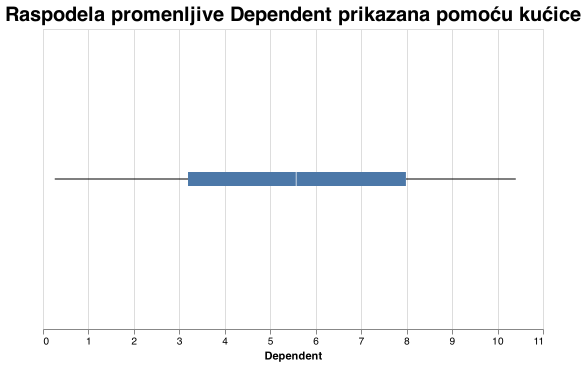

In [102]:
df |> @vlplot(
    mark = {:boxplot, extent = 1.5},
    x = :Dependent,
    title = {text = "Raspodela promenljive Dependent prikazana pomoću kućice", fontSize = 20},
    width = 500,
    height = 300
)

Ukoliko želimo da je grafik orijentisan vertikalno umesto horizontalno, to možemo postići minimalnom izmenom koda prikazanom u ćeliji iznad (tako što ćemo samo parametar **x** zameniti parametrom **y**).

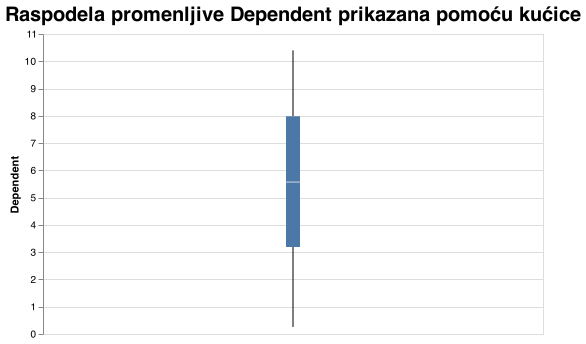

In [103]:
df |> @vlplot(
    mark = {:boxplot, extent = 1.5},
    y = :Dependent,
    title = {text = "Raspodela promenljive Dependent prikazana pomoću kućice", fontSize = 20},
    width = 500,
    height = 300
)

Grafik generisan kodom prikazanim u ćeliji ispod, prikazuje raspodelu kontinualne promenljive **Dependent** u odnosu na kategoričku promenljivu **Group**. Budući da se u promenljivoj **Group** nalaze samo dve različite vrednosti, na grafiku su prikazane samo dve kućice.

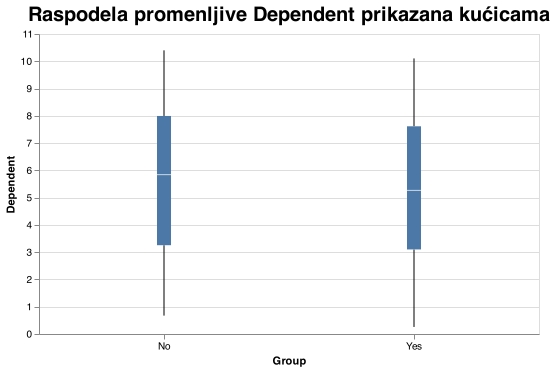

In [104]:
df |> @vlplot(
    mark = {:boxplot, extent = 1.5},
    x = {:Group, axis = {labelAngle = 0}},
    y = :Dependent,
    title = {text = "Raspodela promenljive Dependent prikazana kućicama", fontSize = 20},
    width = 500,
    height = 300
)

U primeru ispod demonstrirana je primena agregacione funkcije **mean** koja traži srednju vrednost promenljive **Dependent**. U konkretnom primeru u parametru **x** je navedeno da želimo da grupišemo opservacije **DataFrame**-a na osnovu vrednosti promenljive **Group**. Prosleđivanjem **:Dependent** atributa promenljivoj **y** i stringa **mean** parametru **aggregate**, naznačili smo da želimo da se primeni traženje srednje vrednosti kao funkcija agregacije. U osnovi, **VegaLite** biblioteka će izvršiti grupisanje svih promenljivih koje imaju vrednost "Yes" atributa **Group** u jedan **DataFrame**, kao i grupisanje svih promenljivih koje kao vrednost imaju "No" u koloni **Group** u drugi **DataFrame** objekat. Nakon toga, primeniće se **mean** funkcija na kolonu **Dependent** svakog **DataFrame**-a individualno. 
Budući da grafik kućica prikazan u ćeliji iznad nije prikazao postojanje elemenata van granica, očekuje se da srednja vrednost i medijan budu približno jednaki.

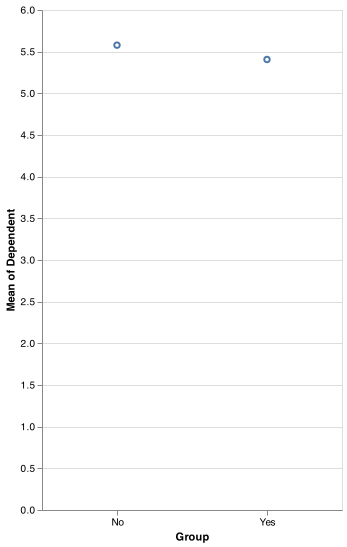

In [105]:
df |> @vlplot(
    mark = :point,
    x = {:Group, axis = {labelAngle = 0}},
    y = {:Dependent, type = :quantitative, aggregate = "mean"},
    width = 300,
    height = 500 
)

### <center> Grafik koji aproksimira funkciju gustine verovatnoće </center>

Prosleđivanjem atributa **:area** parametru **mark** makroa **@vlplot**, biblioteka **VegaLite** iscrtava grafik koji aproksimira funkciju gustine verovatnoće prosleđene promenljive. Kao što možemo videti na grafiku ispod, promenljiva **Dependent** sledi normalnu raspodelu, budući da prikazana kriva "liči" na Gausovu krivu.

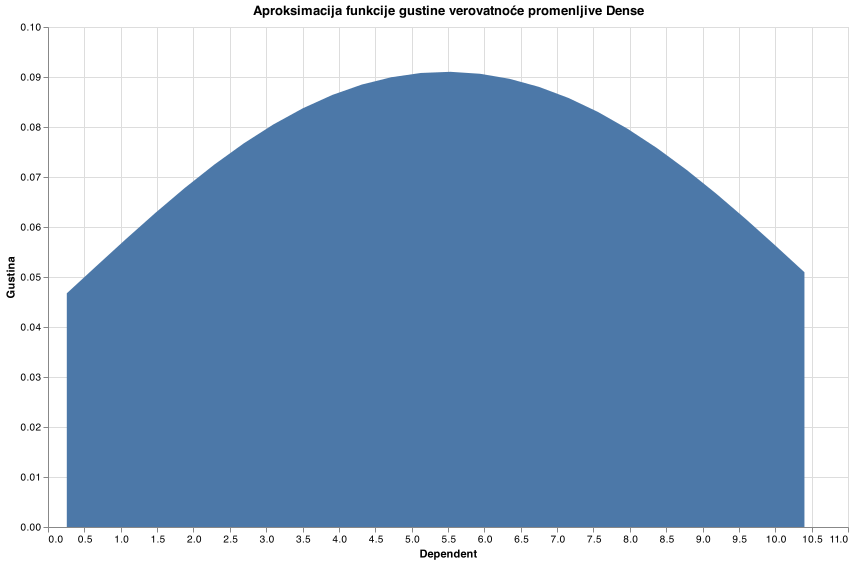

In [106]:
df |> @vlplot(
    mark = :area,
    x = {"value:q", title = "Dependent"},
    y = {"density:q", title = "Gustina"},
    transform = [{density = "Dependent", bandwidth = 3.0}],
    title = "Aproksimacija funkcije gustine verovatnoće promenljive Dense",
    width = 800,
    height = 500
)

Grafikom koji vrši aproksimaciju gustine verovatnoće željene numeričke promenljive možemo predstaviti krive gustine verovatnoća promenljivih u odnosu na neku kategoričku promenljivu, baš kao što je prikazano kodom u ćelliji ispod.

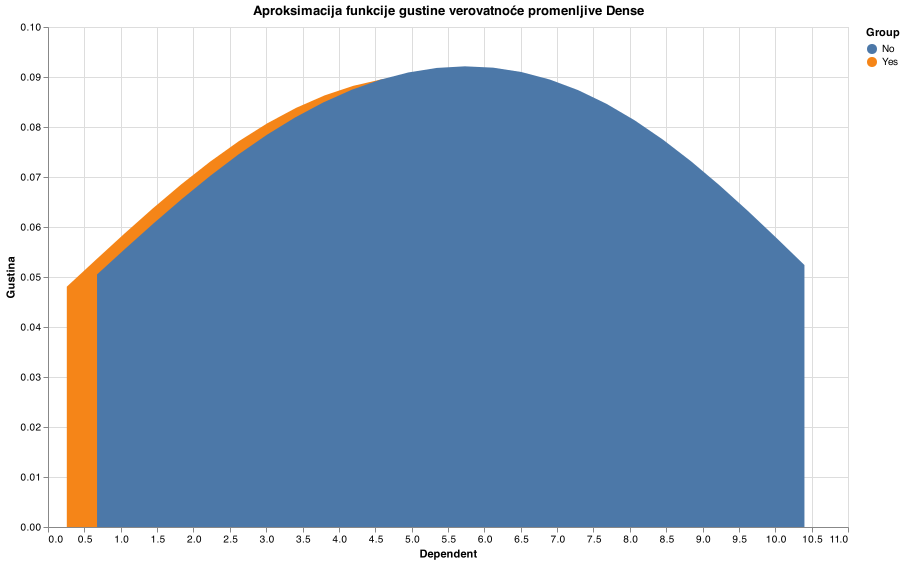

In [107]:
df |> @vlplot(
    mark = :area,
    x = {"value:q", title = "Dependent"},
    y = {"density:q", title = "Gustina"},
    transform = [{density = "Dependent", bandwidth = 3.0, groupby = ["Group"]}],
    title = "Aproksimacija funkcije gustine verovatnoće promenljive Dense",
    color = "Group:n",
    width = 800,
    height = 500
)

Ukoliko navedemo da je vrednost **opacity** parametra manja od 1.0, dobijamo pregledniji prikaz krivih linija gustine verovatnoće kontinualne promenljive u odnosu na navedenu kategoričku promenljivu.

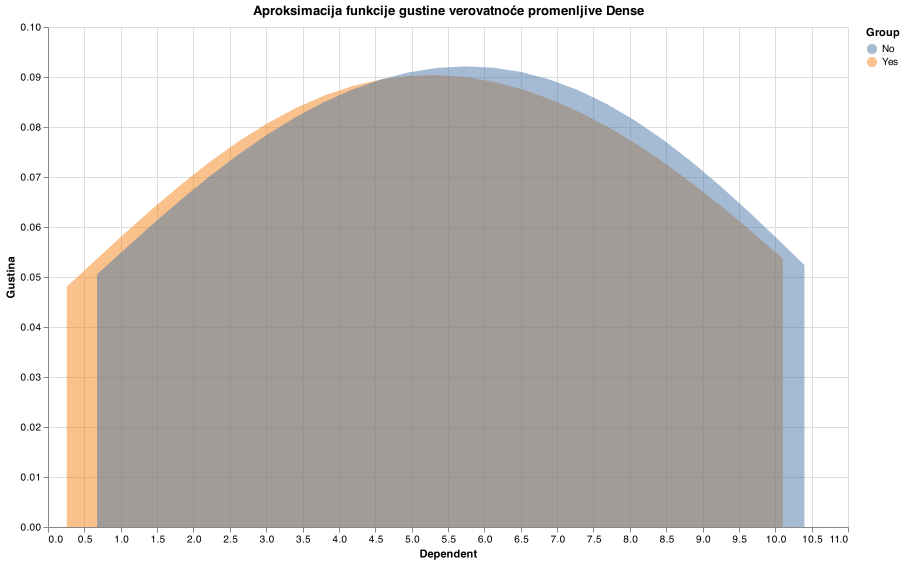

In [108]:
df |> @vlplot(
    mark = :area,
    x = {"value:q", title = "Dependent"},
    y = {"density:q", title = "Gustina"},
    transform = [{density = "Dependent", bandwidth = 3.0, groupby = ["Group"]}],
    title = "Aproksimacija funkcije gustine verovatnoće promenljive Dense",
    color = "Group:n",
    opacity = {value = 0.5},
    width = 800,
    height = 500
)